In [7]:
import os, xarray as xr, numpy as np, pandas as pd, dask, random, netCDF4
import cartopy.crs as ccrs, matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from datetime import datetime as dt, timedelta
import datetime, time

import importlib
import matplotlib.patches as mpatches
import gc
from matplotlib.gridspec import GridSpec
dask.config.set({"array.slicing.split_large_chunks": False})


In [8]:

import pydot, re
from graphviz import Source
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [21]:
import sys
sys.path.insert(1, '/home/data/lab_hardik/udf/')

# os.chdir('/home/data/lab_hardik/udf/')
import custom_funcs
import grad_funcs
import read_data_DSE_flux_funcs

importlib.reload(custom_funcs)
importlib.reload(grad_funcs)

from custom_funcs import *
from grad_funcs import *

from read_data_DSE_flux_funcs import *


In [24]:
help(assign_dates_climatology)

Help on function assign_dates_climatology in module read_data_DSE_flux_funcs:

assign_dates_climatology(ds, year=1900, strftime_col='strftime')
    # +



In [10]:
nibox_lon = [68, 78]
nibox_lat = [24, 31]

In [11]:

Cp = 1005 # J K-1 kg-1
g = 9.80665
R = 287

Rearth = 6378*10**3
steps_x = 4*10
del_lambda = 0.25*np.pi/180
del_phi = 0.25*np.pi/180


In [22]:
# assign_dates_climatology

## Read climatology files

## Read clmt files

In [12]:
dir_clmt = '/home/data/lab_hardik/data/ERA5/climatology/'

In [13]:
# [s for s in dir() if s.startswith('ds')]

In [14]:
importlib.reload(custom_funcs) 
from custom_funcs import *

In [15]:
# import metpy.calc as mpcalc
# import metpy.constants as mpconstants
# from metpy.units import units
# ds_mst.metpy.parse_cf()

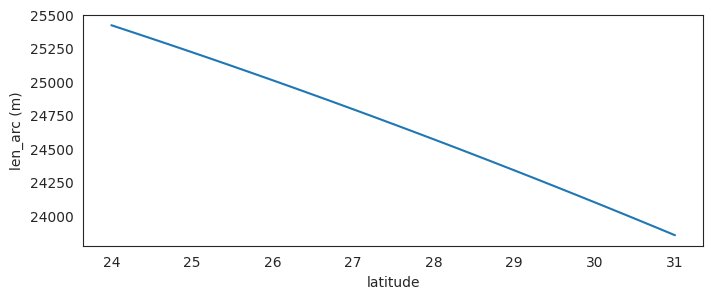

In [16]:
plt.figure(figsize=(8,3))
(Rlat*del_lambda).rename('len_arc (m)').plot()


In [17]:
import variables
from variables import *

In [18]:
# xr.open_dataset(dir_clmt  + 'w_3D/'+ rolling_clmt_file_map['w'])
# xr.open_dataset(dir_clmt + 'w_3D/' + 'SA_dly_clmtlgy_stdPlevs_prmnsn_vertical_velocity_2000_2021.nc')

In [19]:
ds_t_clmt = xr.open_dataset(dir_clmt + 't_3D/' + rolling_clmt_file_map['t'])\
.sel(latitude=slice(30.75, 24), longitude=slice(68,77.75))\
.sortby(['latitude','isobaricInhPa'])\
.rename({'t_dly_clmt_10D_roll':'t'})['t'].to_dataset()

# .drop(['number','step'])\

ds_z_clmt = xr.open_dataset(dir_clmt + 'z_3D/' + rolling_clmt_file_map['z'])\
.sel(latitude=slice(30.75, 24), longitude=slice(68,77.75))\
.sortby(['latitude','isobaricInhPa'])\
.rename({'z_dly_clmt_10D_roll':'z'})['z'].to_dataset()
# .drop(['number','step'])\

ds_u_clmt = xr.open_dataset(dir_clmt + 'u_3D/' + rolling_clmt_file_map['u'])\
.sel(latitude=slice(30.75, 24), longitude=slice(68,77.75))\
.sortby(['latitude','isobaricInhPa'])\
.rename({'u_dly_clmt_10D_roll':'u'})['u'].to_dataset()
# .drop(['number','step'])

ds_v_clmt = xr.open_dataset(dir_clmt + 'v_3D/' + rolling_clmt_file_map['v'])\
.sel(latitude=slice(30.75, 24), longitude=slice(68,77.75))\
.sortby(['latitude','isobaricInhPa'])\
.rename({'v_dly_clmt_10D_roll':'v'})['v'].to_dataset()

# .drop(['number','step'])

# can't use the 1980_2022 dly_clmt as it has clmt of omega, which will need to be converted to m/s
# ds_w_clmt = xr.open_dataset(dir_clmt + 'w_3D/' + 'SA_dly_clmtlgy_stdPlevs_prmnsn_vertical_velocity_2000_2021.nc')\
# .sortby(['latitude','isobaricInhPa'])\
# .sel(latitude=slice(24, 30.75), longitude=slice(68,77.75))\
# .drop(['number','step'])

ds_w_clmt = xr.open_dataset(dir_clmt + 'w_3D/' + rolling_clmt_file_map['w'])\
.sortby(['latitude','isobaricInhPa'])\
.sel(latitude=slice(24, 30.75), longitude=slice(68,77.75))\
.rename({'w_dly_clmt_10D_roll':'w'})['w'].to_dataset()
# .drop(['number','step'])

/home/lab_hardik/my_conda/lib/python3.9/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
/home/lab_hardik/my_conda/lib/python3.9/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
/home/lab_hardik/my_conda/lib/python3.9/site-packages/paramiko/transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.


In [29]:
da_w_up_clmt = \
omega_to_w(
    assign_dates_climatology(
    xr.merge([ds_w_clmt, ds_z_clmt, ds_u_clmt, ds_v_clmt, ds_t_clmt]).rename({'clmt_roll_strftime':'strftime'}), 
    year = 1904
    ).swap_dims({'strftime':'date'}), 
    Rlat = Rlat, 
    Rearth = Rearth, 
    del_lambda = del_lambda, 
    del_phi = del_phi
)

da_w_down_clmt = -1*da_w_up_clmt
da_w_down_clmt.name = 'w_down'

# xr.merge([ds_w_clmt, ds_z_clmt, ds_u_clmt, ds_v_clmt, ds_t_clmt]).rename({'clmt_roll_strftime':'strftime'})
ds_w_clmt = \
xr.merge([ds_w_clmt, da_w_down_clmt.swap_dims({'date':'strftime'}).rename({'strftime':'clmt_roll_strftime'}).to_dataset()])

# ds_w_clmt['w_up'] = (-1*ds_w_clmt['w_down']).assign_attrs(units = 'm/s')

da_dse_clmt = Cp*ds_t_clmt['t'] + ds_z_clmt['z']

pres ord asc


In [30]:
da_theta_clmt = ds_t_clmt['t']*(1000/ds_t_clmt['isobaricInhPa'])**0.287

## DSE fluxes


In [31]:
dir_proc_files = '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/'

### 1995 - 2009 
- Now reading directly from daily means

In [32]:
ds_1995_2009 = xr.open_dataset(dir_proc_files + 'NI_basic_vars_1995_2009.nc')
if 't' in ds_1995_2009.data_vars:
    ds_1995_2009['density'] = (ds_1995_2009['isobaricInhPa']*100/(R*ds_1995_2009['t'])).compute()


### 2010-22

In [33]:
ds_2010_2022 = xr.open_dataset(dir_proc_files + 'NI_basic_vars_2010_2022.nc')
ds_2010_2022

<xarray.Dataset>
Dimensions:                 (isobaricInhPa: 16, latitude: 29, longitude: 41,
                             date: 1586)
Coordinates:
  * isobaricInhPa           (isobaricInhPa) float64 300.0 400.0 ... 975.0 1e+03
  * latitude                (latitude) float64 24.0 24.25 24.5 ... 30.75 31.0
  * longitude               (longitude) float64 68.0 68.25 68.5 ... 77.75 78.0
  * date                    (date) datetime64[ns] 2010-03-01 ... 2022-06-30
Data variables: (12/24)
    z                       (date, isobaricInhPa, latitude, longitude) float32 ...
    z_diff                  (date, isobaricInhPa, latitude, longitude) float32 ...
    t                       (date, isobaricInhPa, latitude, longitude) float32 ...
    density                 (isobaricInhPa, date, latitude, longitude) float64 ...
    u                       (date, isobaricInhPa, latitude, longitude) float32 ...
    v                       (date, isobaricInhPa, latitude, longitude) float32 ...
    ...                      ...
    ni_northBndry_heat_out  (date, isobaricInhPa) float64 ...
    net_heat_flux_x         (date, isobaricInhPa) float64 ...
    net_heat_flux_y         (date, isobaricInhPa) float64 ...
    net_heat_flux_xy        (date, isobaricInhPa) float64 ...
    net_heat_flux_z         (isobaricInhPa, date, latitude, longitude) float64 ...
    z_diff_down             (date, isobaricInhPa, latitude, longitude) float32 ...

### 1980-1994

In [34]:
ds_1980_1994 = xr.open_dataset(dir_proc_files + 'NI_basic_vars_1980_1994.nc')
ds_1980_1994

# ds_1995_2009_mst = xr.open_dataset('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/NI_basic_vars_1995_2009.nc')
# ds_2010_2022_mst = xr.open_dataset('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/NI_basic_vars_2010_2022.nc')


<xarray.Dataset>
Dimensions:        (isobaricInhPa: 23, latitude: 29, longitude: 41, date: 1830)
Coordinates:
  * isobaricInhPa  (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
  * latitude       (latitude) float64 24.0 24.25 24.5 24.75 ... 30.5 30.75 31.0
  * longitude      (longitude) float64 68.0 68.25 68.5 68.75 ... 77.5 77.75 78.0
  * date           (date) datetime64[ns] 1980-03-01 1980-03-02 ... 1994-06-30
    number         int64 ...
    step           timedelta64[ns] ...
Data variables:
    t              (date, isobaricInhPa, latitude, longitude) float32 ...
    u              (date, isobaricInhPa, latitude, longitude) float32 ...
    v              (date, isobaricInhPa, latitude, longitude) float32 ...
    w              (date, isobaricInhPa, latitude, longitude) float32 ...
    density        (isobaricInhPa, date, latitude, longitude) float64 ...
    z              (date, isobaricInhPa, latitude, longitude) float32 ...

### z_diff_down_down is the geopotential diff between given pressure level and the one BELOW it
- e.g. for 500 hPa it is the diff bw 500 hPa and 600 hPa


In [1]:
help(compute_zdiff_fields)

NameError: name 'compute_zdiff_fields' is not defined

In [35]:
importlib.reload(read_data_DSE_flux_funcs)
from read_data_DSE_flux_funcs import *
ds_1980_1994 = \
compute_zdiff_fields(ds_1980_1994)

pressure dim in ascending order


##  copy/ combine to df_mst for flux computations

In [41]:
gc.collect()

73

In [37]:
ds_mst0 = ds_2010_2022[['z', 't', 'u', 'v', 'w', 'density', 'z_diff_down']].copy(deep=True); yr_min = 2010; yr_max = 2022
ds_mst1 = ds_1995_2009[['z', 't', 'u', 'v', 'w','density', 'z_diff_down']].copy(deep=True); yr_min = 1995; yr_max = 2009
ds_mst2 = ds_1980_1994[['z', 't', 'u', 'v', 'w', 'density', 'z_diff_down']].copy(deep=True); yr_min = 1980; yr_max = 1994

# ds_mst = ds_mst0

In [40]:
ds_2010_2022.close()
ds_1995_2009.close()
ds_1980_1994.close()

In [38]:
ds_mst = xr.concat([ds_mst0, ds_mst1, ds_mst2], dim='date').sortby('date')
ds_mst['date'] = ds_mst.date.astype('datetime64[ns]')
ds_mst['pt_dse'] = (Cp*ds_mst['t'] + ds_mst['z'])

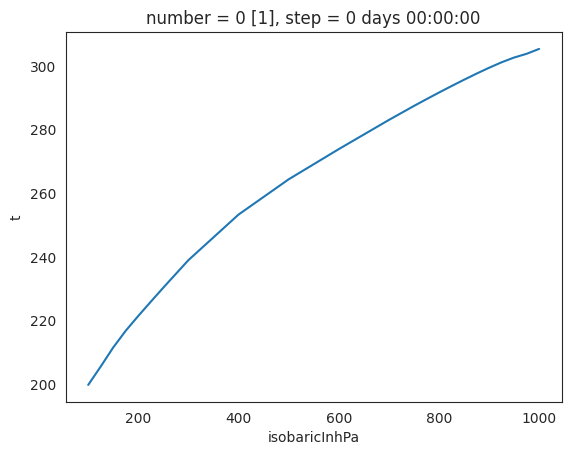

In [43]:
ds_mst['t'].mean(['latitude', 'longitude', 'date']).plot()

In [44]:
ds_mst['theta'] = ds_mst['t']*(1000/ds_mst.isobaricInhPa)**0.287

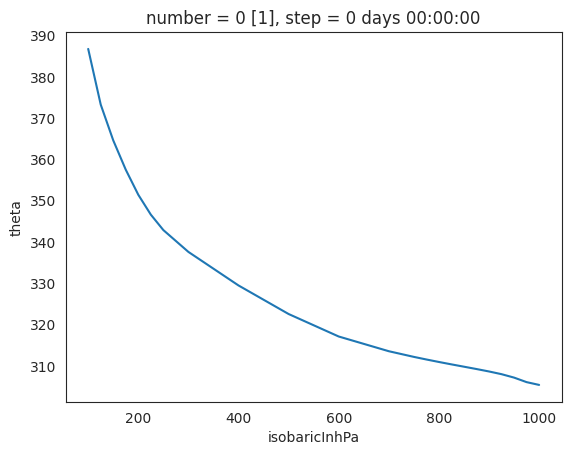

In [45]:
ds_mst['theta'].mean(['latitude', 'longitude', 'date']).plot()

In [46]:
ds_mst

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 23, latitude: 29, longitude: 41, date: 5246)
Coordinates:
  * isobaricInhPa  (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
  * latitude       (latitude) float64 24.0 24.25 24.5 24.75 ... 30.5 30.75 31.0
  * longitude      (longitude) float64 68.0 68.25 68.5 68.75 ... 77.5 77.75 78.0
  * date           (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-06-30
    number         int64 0
    step           timedelta64[ns] 00:00:00
Data variables:
    z              (date, isobaricInhPa, latitude, longitude) float32 1.616e+...
    t              (date, isobaricInhPa, latitude, longitude) float32 194.6 ....
    u              (date, isobaricInhPa, latitude, longitude) float32 25.44 ....
    v              (date, isobaricInhPa, latitude, longitude) float32 -6.15 ....
    w              (date, isobaricInhPa, latitude, longitude) float32 -0.0054...
    density        (isobaricInhPa, date, latitude, longitude) float64 0.1791 ...
    z_diff_down    (date, isobaricInhPa, latitude, longitude) float32 1.263e+...
    pt_dse         (date, isobaricInhPa, latitude, longitude) float32 3.572e+...
    theta          (date, isobaricInhPa, latitude, longitude) float64 376.8 ....

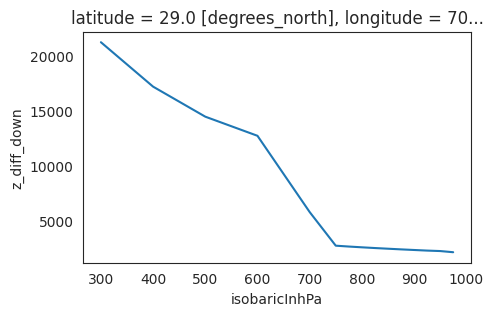

In [47]:
ds_mst['z_diff_down'].isel(latitude=20, longitude=10, date=ds_mst.dims['date']-1).plot(figsize=(5,3))

In [82]:
year_sample = int(np.median(np.unique(ds_mst.date.dt.year.data)))
print(year_sample)

2001


In [83]:
globals()[f'year_sample'] = ds_mst.sel(date = ds_mst.date.dt.year == year_sample)

year_sample = ds_mst.date.dt.year.median().values
globals()[f'ds_{year_sample}'] = ds_mst.sel(date = ds_mst.date.dt.year == year_sample)


In [ ]:
def Rlat_fn(ds):
    return Rearth*np.cos(ds.latitude*np.pi/180)

Rlat = Rlat_fn(ds = ds_mst)

Ayz = (Rearth*del_phi)*(ds_mst['z_diff_down']/g) # select lon of choice for all corresponding NI lats
Axz = (Rlat*del_lambda)*(ds_mst['z_diff_down']/g) # select latitude of choice for all corresponding NI lons
Axy_2 = Rearth**2*del_lambda*(
    np.sin((Rlat.latitude + 0.25)*np.pi/180) - np.sin(Rlat.latitude*np.pi/180)
)

M = (Axy_2*ds_mst['z_diff_down']/g*.5*(ds_mst['density'] + ds_mst['density'].shift(isobaricInhPa=-1)))\
.sel(latitude=slice(24,30.75), longitude=slice(68,77.75))

mass_wgts = M/(M.sum(['latitude','longitude']))
print(mass_wgts.isel(isobaricInhPa=0, date=0).sum().data)

mass_wgts = mass_wgts.rename('mass_wgts')

V = (Axy_2*ds_mst['z_diff_down']/g).sel(latitude=slice(24,30.75), longitude=slice(68,77.75))
vol_wgts = V/(V.sum(['latitude','longitude']))
vol_wgts = vol_wgts.rename('vol_wgts')
print(vol_wgts.isel(isobaricInhPa=0, date=0).sum().data)

## M and V defined for each gridpoint

1.0


In [3]:
# xr.Dataset(dict(mass_wgts = mass_wgts, M = M))\
# .to_netcdf(dir_proc_files + 'mass_wgts_1980_2022.nc')

## Omega-> w: unapproximated conversion 
- using expansion of material derivative of pressure
- using conversion bw pressure coords and cartesian coords

In [ ]:
importlib.reload(custom_funcs) 
from custom_funcs import *

In [ ]:
# del_phi

In [ ]:
ds_mst['w_up'] = omega_to_w(ds_mst, Rlat = Rlat, Rearth = Rearth, del_lambda = del_lambda, del_phi = del_phi)
ds_mst['w_down'] = -ds_mst['w_up']

In [ ]:
print(adv_u.sel(date = adv_u.date.dt.month==4, isobaricInhPa = 600).mean().data)
print(adv_v.sel(date = adv_v.date.dt.month==4, isobaricInhPa = 600).mean().data)
print(time_deriv.sel(date = time_deriv.date.dt.month==4, isobaricInhPa = 600).mean().data)
print(ds_mst.sel(date = ds_mst.date.dt.month==4, isobaricInhPa = 600)['w'].mean().data)


Scales say that all you should care about is omega

In [ ]:
importlib.reload(custom_funcs)
from custom_funcs import *

In [ ]:
# % change in density due to hydrostatic approx.
# Clearly upper levels are most deviated from the same

ds_mst['w_down_hyd_bal'] = ds_mst['w']/ds_mst['density']/g
ds_mst['w_diffPerc'] = (100*(ds_mst['w_down'] - ds_mst['w_down_hyd_bal'])/ds_mst['w_down'])

ds_mst.where(np.abs(ds_mst['w_diffPerc']) > 0.01, drop=True)['w_diffPerc'].sel(latitude=slice(24,30.75), longitude=slice(68,77.75))\
.mean(['latitude', 'longitude']).sel(isobaricInhPa = slice(300,975))\
.transpose().plot(vmin=-100, vmax=100, cmap='coolwarm')

# w_diff = ((ds_mst['w_down'] - ds_mst['w']/ds_mst['density']/g))\
# .sel(latitude=slice(24,30.75), longitude=slice(68,77.75))\
# .mean(['latitude', 'longitude']).sel(isobaricInhPa = slice(300,975))

In [54]:
ds_mst

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 23, latitude: 29, longitude: 41, date: 5246)
Coordinates:
  * isobaricInhPa  (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
  * latitude       (latitude) float64 24.0 24.25 24.5 24.75 ... 30.5 30.75 31.0
  * longitude      (longitude) float64 68.0 68.25 68.5 68.75 ... 77.5 77.75 78.0
  * date           (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-06-30
    number         int64 0
    step           timedelta64[ns] 00:00:00
Data variables:
    z              (date, isobaricInhPa, latitude, longitude) float32 1.616e+...
    t              (date, isobaricInhPa, latitude, longitude) float32 194.6 ....
    u              (date, isobaricInhPa, latitude, longitude) float32 25.44 ....
    v              (date, isobaricInhPa, latitude, longitude) float32 -6.15 ....
    w              (date, isobaricInhPa, latitude, longitude) float32 -0.0054...
    density        (isobaricInhPa, date, latitude, longitude) float64 0.1791 ...
    z_diff_down    (date, isobaricInhPa, latitude, longitude) float32 1.263e+...
    pt_dse         (date, isobaricInhPa, latitude, longitude) float32 3.572e+...
    theta          (date, isobaricInhPa, latitude, longitude) float64 376.8 ....
    w_up           (date, isobaricInhPa, latitude, longitude) float64 0.00355...
    w_down         (date, isobaricInhPa, latitude, longitude) float64 -0.0035...

In [ ]:
fig, ax = plt.subplots(2,2, squeeze=False, figsize=(16,5))

w_dict = {
    0: 'w_down',
    1: 'w_up', 
    2: 'w',
#     3: 'w_diffPerc'
    3: 'w_down_hyd_bal'
    
}

ds_plt = ds_mst.sel(date = ds_mst.date.dt.year == year_sample)

for j in range(4):
    r = bicol_panel_rownum(j)
    c = bicol_panel_colnum(j)

    low_val = ds_plt[w_dict[j]].quantile(0.05)
    high_val = ds_plt[w_dict[j]].quantile(0.95)
    cond = np.abs(low_val) > np.abs(high_val)
    
    ds_plt[w_dict[j]].sel(latitude=slice(24,30.75), longitude=slice(68,77.75))\
    .mean(['latitude', 'longitude']).sel(isobaricInhPa = slice(300,975)).compute().transpose()\
    .plot(ax=ax[r,c],
          vmin = low_val if cond else -1*high_val, 
         vmax = -1*low_val if cond else high_val, 
          cmap='coolwarm'
         )
    ax[r,c].invert_yaxis()
    ax[r,c].set_title(w_dict[j])
    
plt.tight_layout()


In [53]:
yr_min

1980

## Ballpark numbers (J kg-1) - unweighted spatial means 

In [ ]:
ds_mst['pt_dse'].sel(latitude=slice(24,30.75), longitude=slice(68,77.75), date = ds_mst.date.dt.year==year_sample)\
.mean(['latitude', 'longitude']).sel(isobaricInhPa = slice(300,975)).transpose().plot()

In [ ]:
os.getcwd()

In [ ]:
# mass_wgts

## Mass in a gridbox is based on the average density bw vertical levels bounding 

In [ ]:
# mass_wgts.isel(date=0, latitude=0, longitude=0)
# .mean(['date','longitude','latitude'])

## Calculate anomalies

In [55]:
ds_mst['t_anom'] = \
ds_mst['t'].groupby(ds_mst['t'].date.dt.strftime('%d-%b')) - \
ds_t_clmt['t'].rename({'clmt_roll_strftime': 'strftime'})


In [56]:
ds_mst['z_anom'] = ds_mst['z'].groupby(ds_mst['z'].date.dt.strftime('%d-%b')) - \
ds_z_clmt['z'].rename({'clmt_roll_strftime': 'strftime'})

ds_mst['dse_anom'] = Cp*ds_mst['t_anom'] + ds_mst['z_anom']

In [57]:
ds_mst['theta_anom'] = ds_mst['t_anom']*(1000/ds_mst['isobaricInhPa'])**0.287

In [58]:
# ds_mst['dse_anom'].to_dataset().sortby('date')\
# .to_netcdf(dir_out + 'DSE_anom_NI_1980_2022.nc')
# dse_anom and dse_clmt get exported in advection_breakdowns files later on. 

In [59]:
ds_mst['u_anom'] = \
ds_mst['u'].groupby(ds_mst['u'].date.dt.strftime('%d-%b')) - \
ds_u_clmt['u'].rename({'clmt_roll_strftime': 'strftime'})

ds_mst['v_anom'] = \
ds_mst['v'].groupby(ds_mst['v'].date.dt.strftime('%d-%b')) - \
ds_v_clmt['v'].rename({'clmt_roll_strftime': 'strftime'})

## w_down anom

In [60]:
importlib.reload(grad_funcs)
from grad_funcs import *

In [61]:
ds_mst['w_down_anom'] = \
ds_mst['w_down'].groupby(ds_mst.date.dt.strftime('%d-%b')) - \
ds_w_clmt['w_down'].drop('date').rename({'clmt_roll_strftime': 'strftime'})

In [62]:
ds_mst['w_up_anom'] = -1*ds_mst['w_down_anom']

In [63]:
dse_clmt = Cp*ds_t_clmt.t + ds_z_clmt.z
dse_clmt = dse_clmt.rename('dse_clmt')

In [66]:
ds_mst
# .data_vars

<xarray.Dataset>
Dimensions:          (isobaricInhPa: 23, latitude: 29, longitude: 41, date: 5246)
Coordinates:
  * isobaricInhPa    (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
  * latitude         (latitude) float64 24.0 24.25 24.5 ... 30.5 30.75 31.0
  * longitude        (longitude) float64 68.0 68.25 68.5 ... 77.5 77.75 78.0
  * date             (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-06-30
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         (date) object '01-Mar' '02-Mar' ... '29-Jun' '30-Jun'
    dates_roll_clmt  (date) datetime64[ns] ...
Data variables: (12/19)
    z                (date, isobaricInhPa, latitude, longitude) float32 1.616...
    t                (date, isobaricInhPa, latitude, longitude) float32 194.6...
    u                (date, isobaricInhPa, latitude, longitude) float32 25.44...
    v                (date, isobaricInhPa, latitude, longitude) float32 -6.15...
    w                (date, isobaricInhPa, latitude, longitude) float32 -0.00...
    density          (isobaricInhPa, date, latitude, longitude) float64 0.179...
    ...               ...
    dse_anom         (date, isobaricInhPa, latitude, longitude) float32 -3.65...
    theta_anom       (date, isobaricInhPa, latitude, longitude) float64 -7.36...
    u_anom           (date, isobaricInhPa, latitude, longitude) float32 -0.52...
    v_anom           (date, isobaricInhPa, latitude, longitude) float32 -7.97...
    w_down_anom      (date, isobaricInhPa, latitude, longitude) float64 -0.00...
    w_up_anom        (date, isobaricInhPa, latitude, longitude) float64 0.004...

In [65]:
ds_mst.to_netcdf(dir_proc_files + 'NI_anoms_bsc_vars_1980_2022.nc')

In [ ]:
importlib.reload(grad_funcs)
from grad_funcs import *

In [ ]:
gradz_dse_clmt = \
grad_z_act(
    assign_dates_climatolgy(
        da_dse_clmt.mean(['latitude', 'longitude']), strftime_col = 'clmt_roll_strftime'
    ).swap_dims({'clmt_roll_strftime':'date'}), 
    assign_dates_climatolgy(
        (ds_z_clmt['z'] - ds_z_clmt['z'].shift(isobaricInhPa = -1)).mean(['latitude', 'longitude']), strftime_col = 'clmt_roll_strftime'
    ).swap_dims({'clmt_roll_strftime':'date'})
)

In [ ]:
# ### In the context of geopotential
# ds_w_z = ds_mst.sel(isobaricInhPa = 300, date = ds_mst.date.dt.year==2016).isel(date= 10)

# plot_composite(da_plt = ds_w_z['w_up'], 
#                    da_cont = ds_w_z['z_anom'], 
#                    da_u = ds_w_z['u_anom'], da_v = ds_w_z['v_anom'], xmin = 0, xmax = 120, ymin = 10, ymax = 60, 
#                figsize=(16,5), cont_divisions=100, 
#                   t_type = 'anomaly',
#                   cmap = 'coolwarm',
#                   scale_quiv= 2)

In [ ]:
globals()[f'mass_wgts_{year_sample}'] = mass_wgts.sel(date = mass_wgts.date.dt.year==year_sample)

In [ ]:
# dse_clmt_wgtd = assign_dates_climatolgy_2(ds=dse_clmt)
# dse_clmt_boxMean = dse_clmt_wgtd.sum(['latitude', 'longitude'])


In [ ]:
# wts_sample = mass_wgts.isel(isobaricInhPa=2, latitude=0, longitude=0)

# dse_clmt_sample = dse_clmt.isel(isobaricInhPa=2, latitude=0, longitude=0)

# xr.broadcast(mass_wgts, dse_clmt)[1]

In [ ]:
# dse_clmt_boxMean_lag1d = dse_clmt_boxMean.shift(date=1)

# dse_clmt_boxMean_lag1d\
# .loc[dict(date = (dse_clmt_boxMean_lag1d.date.dt.day==1) & 
#          (dse_clmt_boxMean_lag1d.date.dt.month==3))] = np.nan

# dse_clmt_boxMean_lag1d = (dse_clmt_boxMean_lag1d).sel(isobaricInhPa = slice(300,975))

# dse_clmt_dlyDiff = (dse_clmt_boxMean['dse_clmt'] - dse_clmt_boxMean_lag1d['dse_clmt'])

- DSE anomaly change = total change - Clmt change

In [2]:
# mass_wgts

In [ ]:
pt_dse_mean = \
(ds_mst['pt_dse']*mass_wgts)\
.sel(latitude=slice(24,30.75), longitude=slice(68,77.75), isobaricInhPa = slice(300,975))\
.sum(['latitude', 'longitude'])

tot_dse = \
(ds_mst['pt_dse']*M)\
.sel(latitude=slice(24,30.75), longitude=slice(68,77.75), isobaricInhPa = slice(300,975))\
.sum(['latitude', 'longitude'])


In [ ]:
# tot_dse_dlyDiff = (tot_dse - tot_dse_shifted).transpose()
# # print(a.sel(date = a.date.dt.year==2016)[0])


In [ ]:
# tot_dse_dlyDiff.sel(date = (tot_dse_dlyDiff.date.dt.month==3) & (tot_dse_dlyDiff.date.dt.day <= 4))

## gradients calculated at each gridpoint, and then mass of each corr gridbox multiplied
-  density gradient between the bounds of each gridbox, both used and not, below


In [691]:
importlib.reload(grad_funcs)
from grad_funcs import *

In [1]:
help(u_gradSclr)

NameError: name 'u_gradSclr' is not defined

In [693]:
u_gradx_dse, v_grady_dse, w_gradz_dse = u_gradSclr(
    u = ds_mst['u'], #.sel(date=ds_mst.date.dt.year.isin([2016,2017]))
    v = ds_mst['v'], 
    w_down = ds_mst['w_down'], 
    scalar = ds_mst['pt_dse'],
    z_diff = ds_mst['z_diff_down']/g,
    u_type = 'daily', 
    scalar_type = 'daily'
)

gc.collect()

0

In [694]:
u_gradx_dse.dims

('date', 'isobaricInhPa', 'latitude', 'longitude')

# Reynolds decomp of advection terms

## Export all 12 RD terms for each pres level

In [695]:
import statsmodels.api as sm
importlib.reload(grad_funcs)
from grad_funcs import *
import gc 


In [696]:
# u'.grad(dse')
uAnom_gradx_dseAnom, vAnom_grady_dseAnom, wAnom_gradz_dseAnom = u_gradSclr(
    u = ds_mst['u_anom'],
    v = ds_mst['v_anom'], 
    w_down = ds_mst['w_down_anom'], 
    scalar = ds_mst['dse_anom'],
    z_diff=ds_mst['z_diff_down']/g,
    u_type = 'daily', 
    scalar_type = 'daily')

In [697]:
# u'.grad(dse-bar)
uAnom_gradx_dseClmt, vAnom_grady_dseClmt, wAnom_gradz_dseClmt = u_gradSclr(
    u = ds_mst['u_anom'],
    v = ds_mst['v_anom'], 
    w_down = ds_mst['w_down_anom'], 
    scalar = dse_clmt.rename({'clmt_roll_strftime': 'strftime'}), 
    z_diff = ds_mst['z_diff_down']/g,

    u_type = 'daily', 
    scalar_type = 'climatology')

In [698]:
uclmt_gradx_dseAnom, vclmt_grady_dseAnom, wclmt_gradz_dseAnom = u_gradSclr(
    u = ds_u_clmt['u'].rename({'clmt_roll_strftime': 'strftime'}), 
       v = ds_v_clmt['v'].rename({'clmt_roll_strftime': 'strftime'}), 
       w_down = ds_w_clmt['w_down'].rename({'clmt_roll_strftime': 'strftime'}), 
       scalar = ds_mst['dse_anom'], 
        z_diff = ds_mst['z_diff_down']/g,

       u_type = 'climatology', 
       scalar_type = 'daily')

In [699]:
uclmt_gradx_dseClmt, vclmt_grady_dseClmt, wclmt_gradz_dseClmt = \
u_gradSclr(
    u = ds_u_clmt['u'].rename({'clmt_roll_strftime': 'strftime'}), # mind you this is 'u' in climatology dataset ds_u_clmt. ## don't panic
    v = ds_v_clmt['v'].rename({'clmt_roll_strftime': 'strftime'}), 
    w_down = ds_w_clmt['w_down'].rename({'clmt_roll_strftime': 'strftime'}), 
    scalar = dse_clmt.rename({'clmt_roll_strftime': 'strftime'}), 
    z_diff = ds_mst['z_diff_down']/g,
    u_type = 'climatology', 
    scalar_type = 'climatology'
)

True
True


### QC check for vertical advection term

In [700]:

ds_tst = ds_mst.isel(latitude=0, longitude=0, date=10)

if ds_tst.isobaricInhPa[1] < ds_tst.isobaricInhPa[2]: 
    print('pressure in asc order')

# .sel(date = (ds_mst.date.dt.year == 1992) & (ds_mst.date.dt.month == 4)).isel(date = 20)
# [:,0,0,0]

    comp_val = 9.80665*ds_tst['w_down_anom'][1]*\
    (ds_tst['dse_anom'][2] - ds_tst['dse_anom'][1])\
    /ds_tst['z_diff_down'][1]
    
    print(comp_val)

    print(wAnom_gradz_dseAnom[10,1,0,0])
    
    print('fwd (upward) difference for the same level: ')
    
    print(9.80665*ds_tst['w_up_anom'][1]*\
    (ds_tst['dse_anom'][0] - ds_tst['dse_anom'][1])/ds_tst['z_diff_down'][0])


pressure in asc order
<xarray.DataArray ()>
array(-0.00714014)
Coordinates:
    isobaricInhPa    float64 125.0
    latitude         float64 24.0
    longitude        float64 68.0
    date             datetime64[ns] 1980-03-11
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         <U6 '11-Mar'
    dates_roll_clmt  datetime64[ns] 1904-03-11
<xarray.DataArray 'w_gradz' ()>
array(-0.00714014)
Coordinates:
    isobaricInhPa    float64 125.0
    latitude         float64 24.0
    longitude        float64 68.0
    date             datetime64[ns] 1980-03-11
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         object '11-Mar'
    dates_roll_clmt  datetime64[ns] 1904-03-11
fwd (upward) difference for the same level: 
<xarray.DataArray ()>
array(0.0034233)
Coordinates:
    latitude         float64 24.0
    longitude        float64 68.0
    date             datetime64[ns] 1980-03-11
    number           int64 0
    

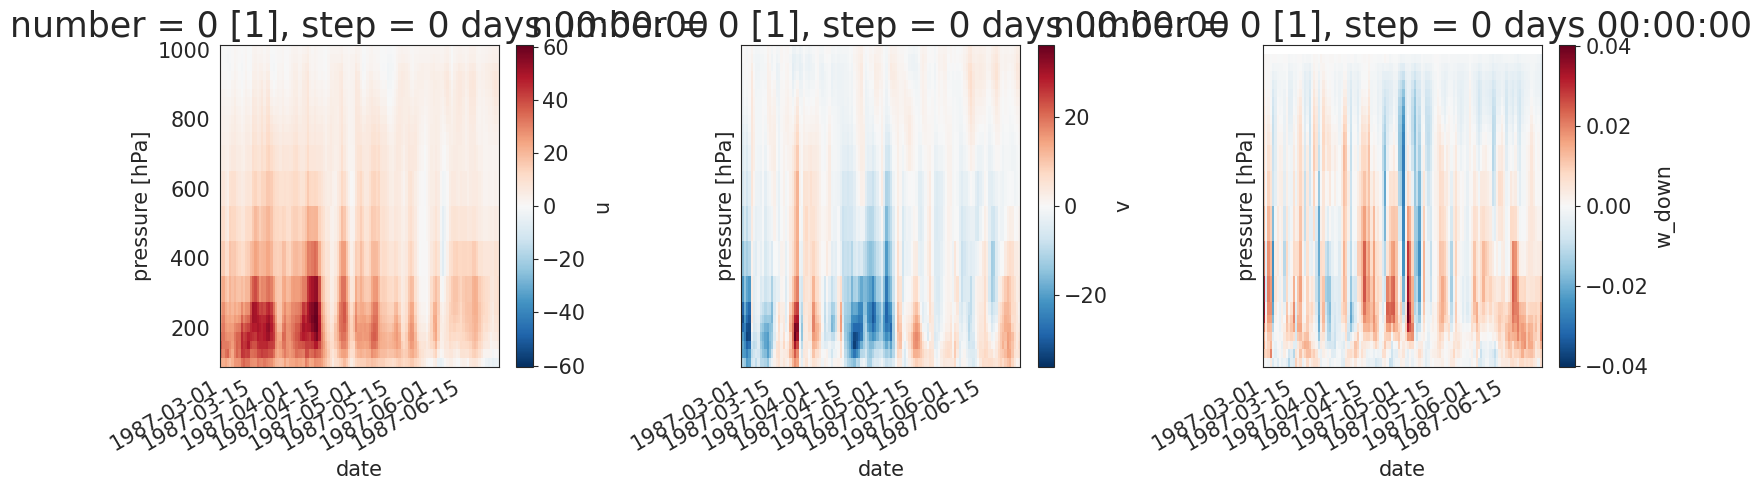

In [701]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize': 15, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':25, # pot title size
         'xtick.labelsize':15,
         'ytick.labelsize':15 # this controls yticks labelsize of both main plot and colorbar 
}
import pylab
pylab.rcParams.update(params)

# wind anomaly magnitudes
fig,ax = plt.subplots(1,3, figsize=(16,5), sharey=True)
with ds_mst['u'] as dsx:
    dsx.sel(date = dsx.date.dt.year==year_sample).mean(['latitude', 'longitude']).transpose().plot(ax=ax[0])

with ds_mst['v'] as dsy:
    dsy.sel(date = dsy.date.dt.year==year_sample).mean(['latitude', 'longitude']).transpose().plot(ax=ax[1])

with ds_mst['w_down'] as dsz:
    dsz.sel(date = dsz.date.dt.year==year_sample).mean(['latitude', 'longitude']).transpose().plot(ax=ax[2])
    
plt.tight_layout()


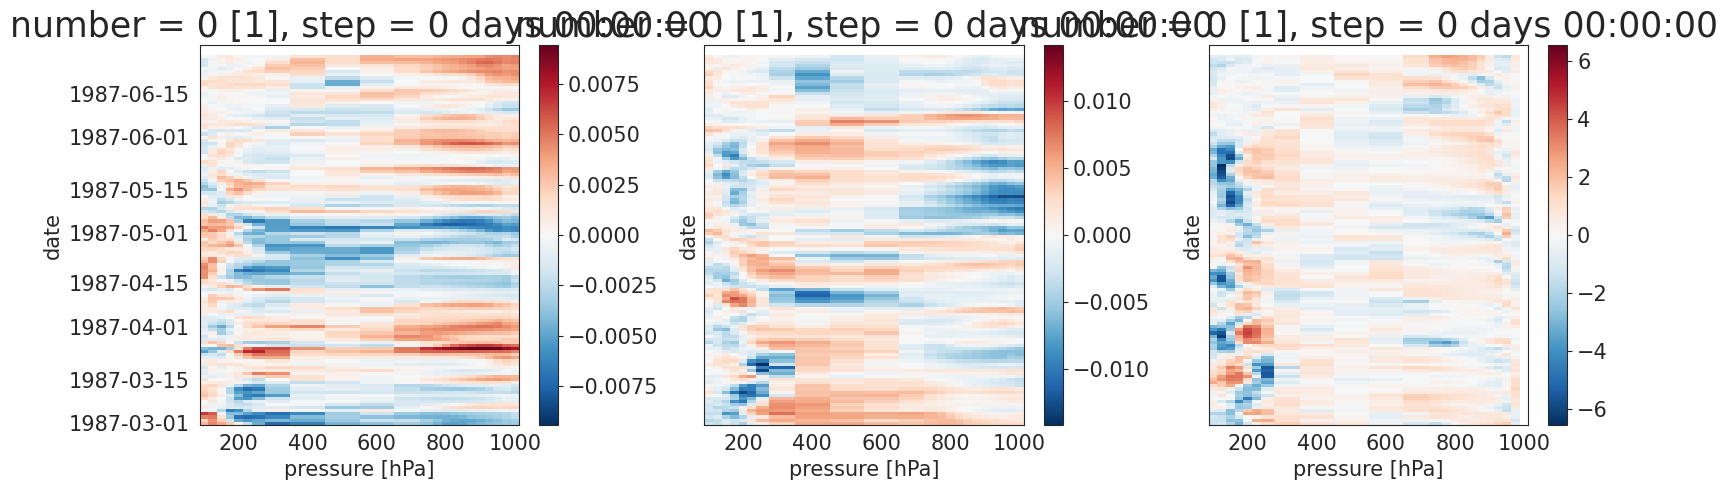

In [702]:
# DSE' gradient magnitudes
fig,ax = plt.subplots(1,3, figsize=(16,5), sharey=True)

with grad_x(ds_mst['dse_anom']) as dsx:
    dsx.sel(date = dsx.date.dt.year==year_sample).mean(['latitude', 'longitude']).plot(ax=ax[0])

with grad_y(ds_mst['dse_anom']) as dsy:
    dsy.sel(date = dsy.date.dt.year==year_sample).mean(['latitude', 'longitude']).plot(ax=ax[1])

with grad_z(ds_mst['dse_anom'], ds_mst['z_diff_down']/g) as dsz:
    dsz.sel(date = dsz.date.dt.year==year_sample).mean(['latitude', 'longitude']).plot(ax=ax[2])
    
plt.tight_layout()


In [703]:
# with (-1*(uAnom_gradx_dseAnom+vAnom_grady_dseAnom+wAnom_gradz_dseAnom)*mass_wgts*86400).sum(['latitude','longitude']) as vAnom_gradDSEANom:
#     plot_3d_t2m((vAnom_gradDSEANom.sel(date = vAnom_gradDSEANom.date.dt.year==2016, isobaricInhPa=slice(300,975))).transpose(), 
#             bin_plevs=False, bin_agg='sum',bin_arr=range(300,1100,100)
#            )
    
#     vAnom_gradDSEANom.sel(date = vAnom_gradDSEANom.date.dt.year==2016).transpose().plot()
#     plt.gca().invert_yaxis()


## dataset with all RD fluxes

In [24]:
dir_proc_files = '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/'

In [705]:
# ds_tst = xr.open_dataset(dir_proc_files + 'RD_DSE_Flx_NI_2010_2022.nc')
# tst = ds_tst.copy(deep=True)
# ds_tst.close()

# name_dict_int = dict(zip(list(tst.data_vars),[s.replace('AdvFlx_', 'grad') for s in list(tst.data_vars)]))
# tst = tst.rename(name_dict = name_dict_int)
# tst.strftime.values
# tst.to_netcdf(dir_proc_files + 'RD_DSE_Flx_NI_2010_2022_trial.nc')


In [706]:
# old_file = os.path.join(dir_proc_files, 'RD_DSE_Flx_NI_2010_2022_trial.nc')
# new_file = os.path.join(dir_proc_files, 'RD_DSE_Flx_NI_2010_2022.nc')

# os.rename(old_file, new_file)

In [707]:
ds_clmt_grad_clmt = \
xr.merge([uclmt_gradx_dseClmt, vclmt_grady_dseClmt, wclmt_gradz_dseClmt])\
.rename({'u_gradx':'uclmt_gradx_dseClmt', 
         'v_grady':'vclmt_grady_dseClmt', 
         'w_gradz':'wclmt_gradz_dseClmt'})

ds_clmt_grad_anom = \
xr.merge([uclmt_gradx_dseAnom, vclmt_grady_dseAnom, wclmt_gradz_dseAnom])\
.rename({'u_gradx':'uclmt_gradx_dseAnom', 
         'v_grady':'vclmt_grady_dseAnom', 
         'w_gradz':'wclmt_gradz_dseAnom'})

ds_anom_grad_anom = \
xr.merge([uAnom_gradx_dseAnom, vAnom_grady_dseAnom, wAnom_gradz_dseAnom])\
.rename({'u_gradx':'uAnom_gradx_dseAnom', 
         'v_grady':'vAnom_grady_dseAnom', 
         'w_gradz':'wAnom_gradz_dseAnom'})

ds_anom_grad_clmt = \
xr.merge([uAnom_gradx_dseClmt, vAnom_grady_dseClmt, wAnom_gradz_dseClmt])\
.rename({'u_gradx':'uAnom_gradx_dseClmt', 
         'v_grady':'vAnom_grady_dseClmt', 
         'w_gradz':'wAnom_gradz_dseClmt'})

ds_adv_decomp = \
xr.merge([
ds_anom_grad_anom, ds_anom_grad_clmt, ds_clmt_grad_anom, ds_clmt_grad_clmt
])

# name_dict_int = dict(zip(list(ds_adv_decomp.data_vars),
# [s.replace('grad', 'AdvFlx_') for s in list(ds_adv_decomp.data_vars)]))

importlib.reload(custom_funcs) 
from custom_funcs import *

# ds_adv_decomp = ds_adv_decomp.rename(name_dict = name_dict_int)
# .vclmt_AdvFlx_y_dseClmt.plot()

ds_adv_decomp

<xarray.Dataset>
Dimensions:              (isobaricInhPa: 23, latitude: 29, longitude: 41,
                          date: 1830)
Coordinates:
  * isobaricInhPa        (isobaricInhPa) float64 100.0 125.0 ... 975.0 1e+03
  * latitude             (latitude) float64 24.0 24.25 24.5 ... 30.5 30.75 31.0
  * longitude            (longitude) float64 68.0 68.25 68.5 ... 77.5 77.75 78.0
  * date                 (date) datetime64[ns] 1980-03-01 ... 1994-06-30
    number               int64 0
    step                 timedelta64[ns] 00:00:00
    strftime             (date) object '01-Mar' '02-Mar' ... '29-Jun' '30-Jun'
    dates_roll_clmt      (date) datetime64[ns] 1904-03-01 ... 1904-06-30
Data variables:
    uAnom_gradx_dseAnom  (date, isobaricInhPa, latitude, longitude) float64 -...
    vAnom_grady_dseAnom  (date, isobaricInhPa, latitude, longitude) float64 -...
    wAnom_gradz_dseAnom  (date, isobaricInhPa, latitude, longitude) float64 -...
    uAnom_gradx_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 6...
    vAnom_grady_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 -...
    wAnom_gradz_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 0...
    uclmt_gradx_dseAnom  (isobaricInhPa, latitude, longitude, date) float64 0...
    vclmt_grady_dseAnom  (isobaricInhPa, latitude, longitude, date) float64 0...
    wclmt_gradz_dseAnom  (isobaricInhPa, latitude, longitude, date) float64 0...
    uclmt_gradx_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 -...
    vclmt_grady_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 0...
    wclmt_gradz_dseClmt  (isobaricInhPa, latitude, longitude, date) float64 -...

In [708]:
# ds_adv_decomp.to_netcdf(dir_proc_files + 'RD_DSE_Flx_NI_{}_{}_rolling.nc'.format(yr_min, yr_max))


### RD exports per pressure level

In [709]:
# if ds_adv_decomp.date.dt.year.min() == 1980 and ds_adv_decomp.date.dt.year.max() == 1994:
#     ds_adv_decomp.to_netcdf(dir_proc_files + 'RD_DSE_Flx_NI_1980_1994.nc')

# if ds_adv_decomp.date.dt.year.min() == 1995 and ds_adv_decomp.date.dt.year.max() == 2009:
#     ds_adv_decomp.to_netcdf(dir_proc_files + 'RD_DSE_Flx_NI_1995_2009.nc')

# if ds_adv_decomp.date.dt.year.min() == 2010 and ds_adv_decomp.date.dt.year.max() == 2022:
#     ds_adv_decomp.to_netcdf(dir_proc_files + 'RD_DSE_Flx_NI_2010_2022.nc')

### Starting here with RD exports per pressure level as a starting point

In [33]:
dir_proc_files = '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/'

ds_rd_1980_1994 = xr.open_dataset(dir_proc_files + 'RD_DSE_Flx_NI_{}_{}_rolling.nc'.format(1980, 1994))
ds_rd_1995_2009 = xr.open_dataset(dir_proc_files + 'RD_DSE_Flx_NI_{}_{}_rolling.nc'.format(1995, 2009))
ds_rd_2010_2022 = xr.open_dataset(dir_proc_files + 'RD_DSE_Flx_NI_{}_{}_rolling.nc'.format(2010, 2022))

ds_adv_decomp = xr.concat([ds_rd_1980_1994, ds_rd_1995_2009, ds_rd_2010_2022], dim='date', coords='minimal')

# for var in list(ds_adv_decomp.data_vars):
#     globals()[f'{var}'] = ds_adv_decomp[var]

In [143]:
ds_adv_decomp

<xarray.Dataset>
Dimensions:              (isobaricInhPa: 23, latitude: 29, longitude: 41,
                          date: 5246)
Coordinates:
  * isobaricInhPa        (isobaricInhPa) float64 100.0 125.0 ... 975.0 1e+03
  * latitude             (latitude) float64 24.0 24.25 24.5 ... 30.5 30.75 31.0
  * longitude            (longitude) float64 68.0 68.25 68.5 ... 77.5 77.75 78.0
  * date                 (date) datetime64[ns] 1980-03-01 ... 2022-06-30
    number               int64 0
    step                 timedelta64[ns] 00:00:00
    strftime             (date) object '01-Mar' '02-Mar' ... '29-Jun' '30-Jun'
    dates_roll_clmt      (date) datetime64[ns] 1904-03-01 ... 1904-06-30
Data variables:
    uAnom_gradx_dseAnom  (date, isobaricInhPa, latitude, longitude) float64 -...
    vAnom_grady_dseAnom  (date, isobaricInhPa, latitude, longitude) float64 -...
    wAnom_gradz_dseAnom  (date, isobaricInhPa, latitude, longitude) float64 -...
    uAnom_gradx_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 6...
    vAnom_grady_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 -...
    wAnom_gradz_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 0...
    uclmt_gradx_dseAnom  (isobaricInhPa, latitude, longitude, date) float64 0...
    vclmt_grady_dseAnom  (isobaricInhPa, latitude, longitude, date) float64 0...
    wclmt_gradz_dseAnom  (isobaricInhPa, latitude, longitude, date) float64 0...
    uclmt_gradx_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 -...
    vclmt_grady_dseClmt  (date, isobaricInhPa, latitude, longitude) float64 0...
    wclmt_gradz_dseClmt  (isobaricInhPa, latitude, longitude, date) float64 -...

In [145]:
da_names = list(ds_adv_decomp.data_vars)
print(da_names)

for name in da_names:
    da = ds_adv_decomp[name]
    globals()[f'{da.name}'] = da

u_gradx_dse = uAnom_gradx_dseAnom + uAnom_gradx_dseClmt + uclmt_gradx_dseAnom + uclmt_gradx_dseClmt
v_grady_dse = vAnom_grady_dseAnom + vAnom_grady_dseClmt + vclmt_grady_dseAnom + vclmt_grady_dseClmt
w_gradz_dse = wAnom_gradz_dseAnom + wAnom_gradz_dseClmt + wclmt_gradz_dseAnom + wclmt_gradz_dseClmt

['uAnom_gradx_dseAnom', 'vAnom_grady_dseAnom', 'wAnom_gradz_dseAnom', 'uAnom_gradx_dseClmt', 'vAnom_grady_dseClmt', 'wAnom_gradz_dseClmt', 'uclmt_gradx_dseAnom', 'vclmt_grady_dseAnom', 'wclmt_gradz_dseAnom', 'uclmt_gradx_dseClmt', 'vclmt_grady_dseClmt', 'wclmt_gradz_dseClmt']


- Decomposed variables created for each presure level

In [147]:
ds_brkdwn0 = xr.open_dataset(dir_proc_files + 'advection_breakdowns_1980_1994_rolling.nc')
ds_brkdwn1 = xr.open_dataset(dir_proc_files + 'advection_breakdowns_1995_2009_rolling.nc')
ds_brkdwn2 = xr.open_dataset(dir_proc_files + 'advection_breakdowns_2010_2022_rolling.nc')

ds_brkdwn = xr.concat([ds_brkdwn0, ds_brkdwn1, ds_brkdwn2], dim='date', coords='minimal')

pt_dse_mean = \
(ds_brkdwn['pt_dse']*mass_wgts)\
.sel(latitude=slice(24,30.75), longitude=slice(68,77.75), isobaricInhPa = slice(300,975))\
.sum(['latitude', 'longitude'])

tot_dse = \
(ds_brkdwn['pt_dse']*M)\
.sel(latitude=slice(24,30.75), longitude=slice(68,77.75), isobaricInhPa = slice(300,975))\
.sum(['latitude', 'longitude'])


In [148]:
ds_mass_wgts = xr.open_dataset(dir_proc_files + 'mass_wgts_1980_2022.nc')
mass_wgts = ds_mass_wgts['mass_wgts']
M = ds_mass_wgts['M']

In [232]:
# ds_brkdwn.dse_anom

In [149]:
# mass_wgts.close()

In [150]:
# (u_gradx_dse+v_grady_dse+w_gradz_dse).to_netcdf(dir_proc_files + 'net_v_grad_dse_nibox_1995_2022.nc')
# (u_gradx_dse).to_netcdf(dir_proc_files + 'u_gradx_dse_nibox_1995_2022.nc')
# (v_grady_dse).to_netcdf(dir_proc_files + 'v_grady_dse_nibox_1995_2022.nc')
# (w_gradz_dse).to_netcdf(dir_proc_files + 'w_gradz_dse_nibox_1995_2022.nc')
# [s for s in dir() if not s.startswith('_')]

Below, 
- mass_wgts represent horizontal weights at given vertical level, 
- hence work only for point quantity representation of horizontal distribution

In [151]:
v_gradDSE = \
(-1*(u_gradx_dse+v_grady_dse+w_gradz_dse)*mass_wgts*86400)\
                 .sel(latitude=slice(24,30.75), longitude=slice(68,77.75))\
                 .sum(['latitude','longitude'])

# point quantity representation of horizontal distribution of DSE
u_gradx_dse_agg = \
(-1*u_gradx_dse*mass_wgts*86400).sel(latitude=slice(24,30.75), longitude=slice(68,77.75)).sum(['latitude','longitude'])

v_grady_dse_agg = \
(-1*v_grady_dse*mass_wgts*86400).sel(latitude=slice(24,30.75), longitude=slice(68,77.75)).sum(['latitude','longitude'])

w_gradz_dse_agg = \
(-1*w_gradz_dse*mass_wgts*86400).sel(latitude=slice(24,30.75), longitude=slice(68,77.75)).sum(['latitude','longitude'])

In [152]:
print(v_gradDSE.dims)
print(v_gradDSE['isobaricInhPa'].values)

('date', 'isobaricInhPa')
[ 100.  125.  150.  175.  200.  225.  250.  300.  400.  500.  600.  700.
  750.  775.  800.  825.  850.  875.  900.  925.  950.  975. 1000.]


# Pick bands where Advection explains DSE changes

In [153]:

importlib.reload(custom_funcs)
from custom_funcs import *

# help(custom_funcs)

In [154]:
pt_dse_shift_mean = pt_dse_mean.shift(date=1)

pt_dse_shift_mean.loc[dict(date = (pt_dse_shift_mean.date.dt.day==1) & 
                                  (pt_dse_shift_mean.date.dt.month==3))
                            ] = np.nan

pt_dse_shift_mean = pt_dse_shift_mean.dropna('date')


4558
4467
cor w/ lag1d sum 0.45
cor w/ same day sum 0.54
cor w/ both days' avg sum 0.56
flxVar_net_colSum, flxVar_lag1d_colSum, dseVar_diffColSum, coready_dse_change, coready_DSEflx_lag1d, coready_DSEflx created


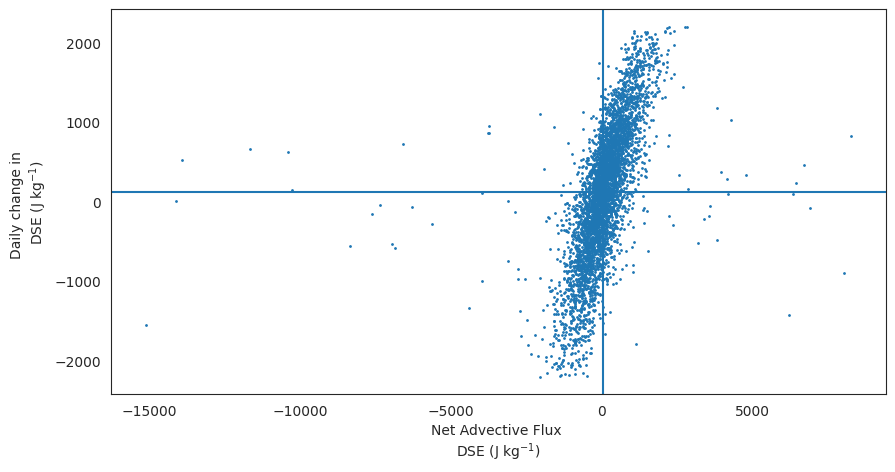

In [155]:
p_low = 600
p_high = 900

ds_flx = (-1*(u_gradx_dse+v_grady_dse+w_gradz_dse)*86400)

coready_DSEflx, coready_DSEflx_lag1d, coready_dse_del1, cor_sameday, cor_lag1d, cor_ave = \
calc_cor(
    flxVar = ds_flx, #.sel(date = ds_flx.date.dt.year != 1992),
    M = M,

    dlyVar = pt_dse_mean, #.sel(date = pt_dse_mean.date.dt.year != 1992),
#   dlyVar = tot_dse, 
    mon_lst=[3,4,5,6], 
    jun_dmax = 15, 

    dlyVar_shifted = pt_dse_shift_mean, #.sel(date = pt_dse_shift_mean.date.dt.year != 1992), 
#   dlyVar_shifted = tot_dse_shifted, 
    pres_range=[p_low,p_high], 
    plots='on', 
    trim_quant=.98, 
#   xlimits=[-2.5*10**3, 2.5*10**3],
#   ylimits=[-2.5*10**3, 2.5*10**3],
    figsize = (10,5)
        )


-2204.8464384256786
2196.162714191673


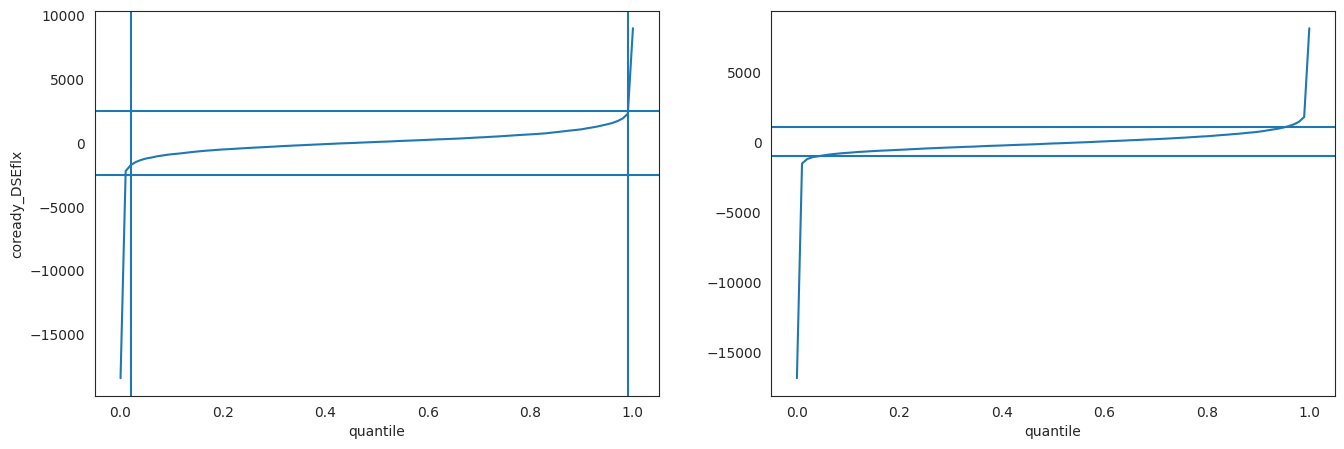

In [156]:
fig,ax = plt.subplots(1,2,figsize=(16,5), )
coready_DSEflx.quantile(np.linspace(0,1,101)).plot(ax=ax[0])
ax[0].axvline(0.02)
ax[0].axvline(0.99)

ax[0].axhline(2500)
ax[0].axhline(-2500)

(coready_DSEflx - coready_dse_del1).quantile(np.linspace(0,1,101)).plot(ax=ax[1])
ax[1].axhline((coready_DSEflx - coready_dse_del1).quantile(0.05))
ax[1].axhline((coready_DSEflx - coready_dse_del1).quantile(0.95))

print(coready_dse_del1.min().data)
print(coready_dse_del1.max().data)


In [157]:
dir_proc_files

'/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/'

In [158]:
da_flx_outlier_dates = \
coready_DSEflx.where(np.abs(coready_DSEflx) > 3500, drop=True).date

In [159]:
print(len(da_flx_outlier_dates))
doi = da_flx_outlier_dates.data[2]
print(doi)
print(da_flx_outlier_dates.groupby(da_flx_outlier_dates.date.dt.year).count())


36
1983-04-01T00:00:00.000000000
<xarray.DataArray 'date' (year: 6)>
array([ 1,  1,  3,  9, 20,  2])
Coordinates:
    number    int64 0
    step      timedelta64[ns] 00:00:00
    quantile  float64 0.98
  * year      (year) int64 1980 1981 1983 1991 1992 1999


In [160]:
# w_gradz_dse.where(w_gradz_dse.date == pd.to_datetime(doi), drop=True)

## Debugging HUGE fluxes 

In [727]:
# w_gradz_dse_agg
ds_w_adv_tst = (-1*w_gradz_dse*86400)
ds_u_adv_tst = (-1*u_gradx_dse*86400)
ds_v_adv_tst = (-1*v_grady_dse*86400)

print(vert_MassAve_qty(
        M = M, 
        qty = ds_w_adv_tst.sel(
            date = ds_w_adv_tst.date == doi).compute(), 
        p_low=600, p_high=900
    ))

print(vert_MassAve_qty(
        M = M, 
        qty = ds_u_adv_tst.sel(
            date = ds_u_adv_tst.date == doi).compute(), 
        p_low=600, p_high=900
    ))

print(vert_MassAve_qty(
        M = M, 
        qty = ds_v_adv_tst.sel(
            date = ds_v_adv_tst.date == doi).compute(), 
        p_low=600, p_high=900
    ))


<xarray.DataArray (date: 1)>
array([1817.38861651])
Coordinates:
  * date             (date) datetime64[ns] 1982-03-02
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         (date) object '02-Mar'
    dates_roll_clmt  (date) datetime64[ns] 1904-03-02
<xarray.DataArray (date: 1)>
array([2457.68444793])
Coordinates:
  * date             (date) datetime64[ns] 1982-03-02
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         (date) object '02-Mar'
    dates_roll_clmt  (date) datetime64[ns] 1904-03-02
<xarray.DataArray (date: 1)>
array([-1100.06168526])
Coordinates:
  * date             (date) datetime64[ns] 1982-03-02
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         (date) object '02-Mar'
    dates_roll_clmt  (date) datetime64[ns] 1904-03-02


In [728]:

print(
    vert_MassAve_qty(
        M = M.sel(date = doi), 
        qty = -1*86400*ds_adv_decomp[
            ['uAnom_gradx_dseAnom', 'uAnom_gradx_dseClmt', 'uclmt_gradx_dseClmt', 'uclmt_gradx_dseAnom']
        ].sel(date = doi), 
        p_low=600, p_high=900
    )
)


<xarray.Dataset>
Dimensions:              ()
Coordinates:
    date                 datetime64[ns] 1982-03-02
    number               int64 0
    step                 timedelta64[ns] 00:00:00
    strftime             object '02-Mar'
    dates_roll_clmt      datetime64[ns] 1904-03-02
Data variables:
    uAnom_gradx_dseAnom  float64 193.6
    uAnom_gradx_dseClmt  float64 80.09
    uclmt_gradx_dseClmt  float64 -217.6
    uclmt_gradx_dseAnom  float64 2.402e+03


## Debugging the reason for flux outliers

In [729]:
vert_MassAve_qty(
    M = M.sel(date = doi), 
    qty = grad_x(ds_mst['dse_anom'].sel(date = doi)),
    p_low=600, p_high=900
)


<xarray.DataArray ()>
array(-0.00358684)
Coordinates:
    number           int64 0
    step             timedelta64[ns] 00:00:00
    date             datetime64[ns] 1982-03-02
    strftime         <U6 '02-Mar'
    dates_roll_clmt  datetime64[ns] 1904-03-02

In [730]:
vert_MassAve_qty(
    M = M.sel(date = doi), 
    qty = ds_mst['u_anom'].sel(date = doi),
    p_low=600, p_high=900
)


<xarray.DataArray ()>
array(0.67297985)
Coordinates:
    number           int64 0
    step             timedelta64[ns] 00:00:00
    date             datetime64[ns] 1982-03-02
    strftime         <U6 '02-Mar'
    dates_roll_clmt  datetime64[ns] ...

In [733]:
# fig,ax = plt.subplots(2,1,figsize=(16,8))
# u_gradx_dse_agg.sel(date = u_gradx_dse_agg.date.dt.year==2022, isobaricInhPa=slice(300,975)).transpose().plot(ax=ax[0])
# ax[0].invert_yaxis()

# ds_mst['u'].sel(date = ds_mst.date.dt.year==2022, isobaricInhPa=slice(300,975)).mean(['latitude','longitude']).transpose().plot(ax=ax[1])
# ax[1].invert_yaxis()
# plt.tight_layout()
# # .plot(**dict(figsize=(16,5), ))
# # plt.gca().invert_yaxis()

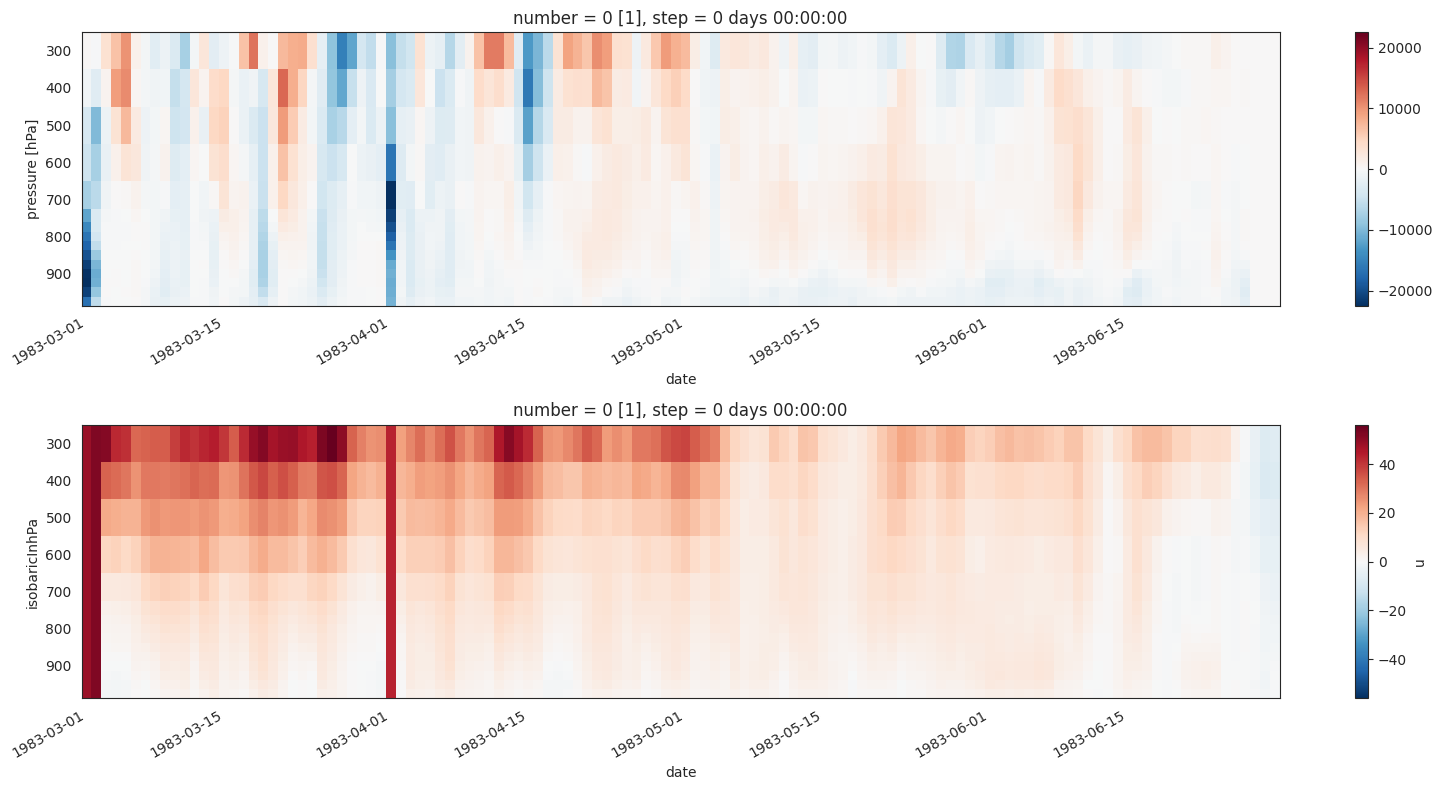

In [247]:
fig,ax = plt.subplots(2,1,figsize=(16,8))
u_gradx_dse_agg.sel(date = u_gradx_dse_agg.date.dt.year==1983, isobaricInhPa=slice(300,975)).transpose().plot(ax=ax[0])
ax[0].invert_yaxis()

ds_mst['u'].sel(date = ds_mst.date.dt.year==1983, isobaricInhPa=slice(300,975)).mean(['latitude','longitude']).transpose().plot(ax=ax[1])
ax[1].invert_yaxis()
plt.tight_layout()
# .plot(**dict(figsize=(16,5), ))
# plt.gca().invert_yaxis()

In [175]:
a = ds_mst['u'].mean(['latitude','longitude'])
b = ds_mst['v'].mean(['latitude','longitude'])
c = ds_mst['w'].mean(['latitude','longitude'])

ds_u_v_w = xr.merge([a,b,c])

In [176]:
excl_dates = ds_u_v_w.where(
    ((ds_u_v_w['u'].sel(isobaricInhPa = 300) == ds_u_v_w['u'].sel(isobaricInhPa = 500)) 
        & (ds_u_v_w['u'].sel(isobaricInhPa = 300) == ds_u_v_w['u'].sel(isobaricInhPa = 900)))
    
  |  ((ds_u_v_w['v'].sel(isobaricInhPa = 300) == ds_u_v_w['v'].sel(isobaricInhPa = 500)) 
        & (ds_u_v_w['v'].sel(isobaricInhPa = 300) == ds_u_v_w['v'].sel(isobaricInhPa = 900)))

   |     ((ds_u_v_w['w'].sel(isobaricInhPa = 300) == ds_u_v_w['w'].sel(isobaricInhPa = 500)) 
        & (ds_u_v_w['w'].sel(isobaricInhPa = 300) == ds_u_v_w['w'].sel(isobaricInhPa = 900)))
, 
    drop=True
).date.to_pandas()



In [179]:
# excl_dates.to_csv(dir_proc_files + '1980_2022_exclusion_dates.csv')
print(len(excl_dates))

96


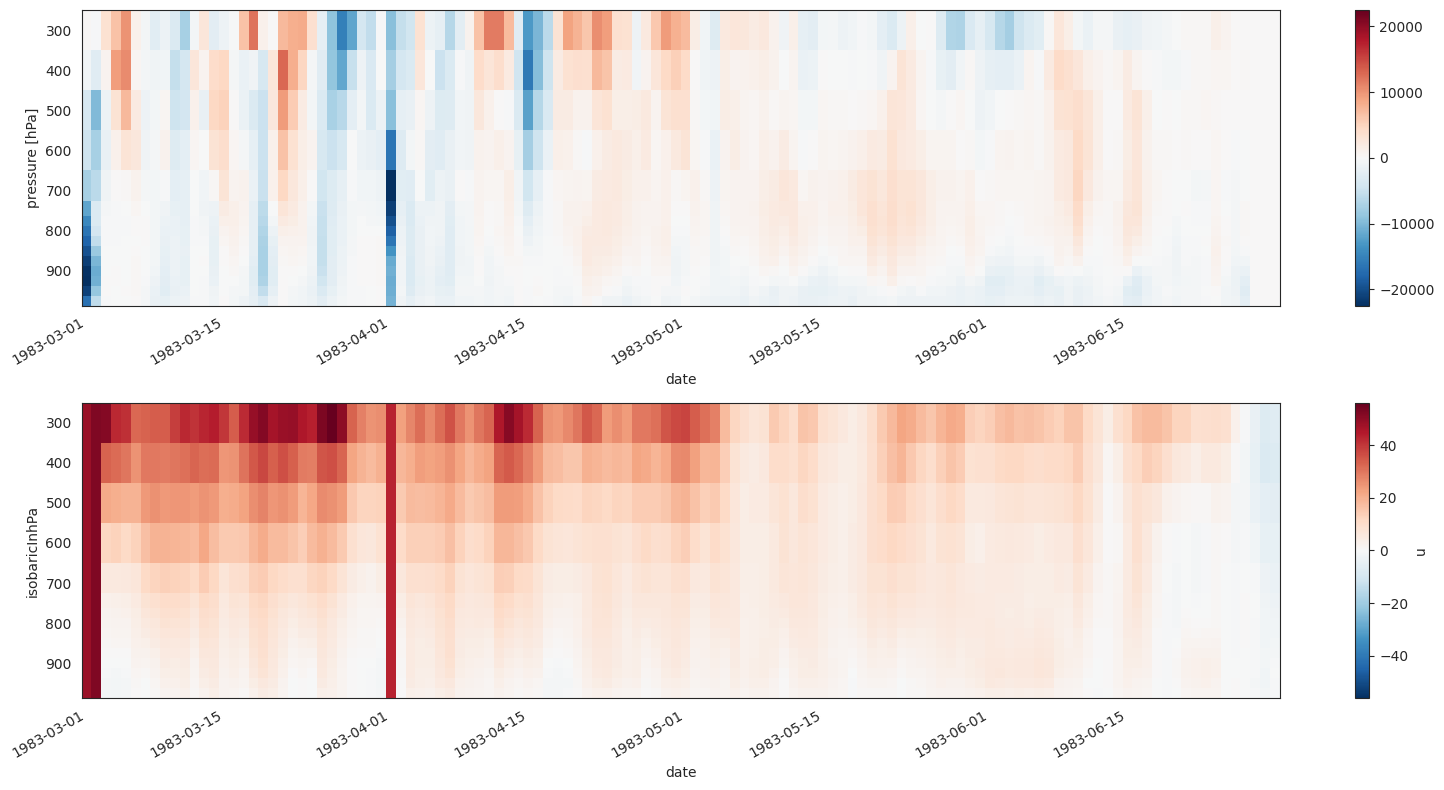

In [248]:
fig,ax = plt.subplots(2,1,figsize=(16,8))
u_gradx_dse_agg.sel(date = u_gradx_dse_agg.date.dt.year==1983, isobaricInhPa=slice(300,975)).drop(['number','step']).transpose().plot(ax=ax[0])
ax[0].invert_yaxis()

ds_mst['u'].sel(date = ds_mst.date.dt.year==1983, isobaricInhPa=slice(300,975)).mean(['latitude','longitude']).drop(['number','step']).transpose().plot(ax=ax[1])
ax[1].invert_yaxis()
plt.tight_layout()
# .plot(**dict(figsize=(16,5), ))
# plt.gca().invert_yaxis()

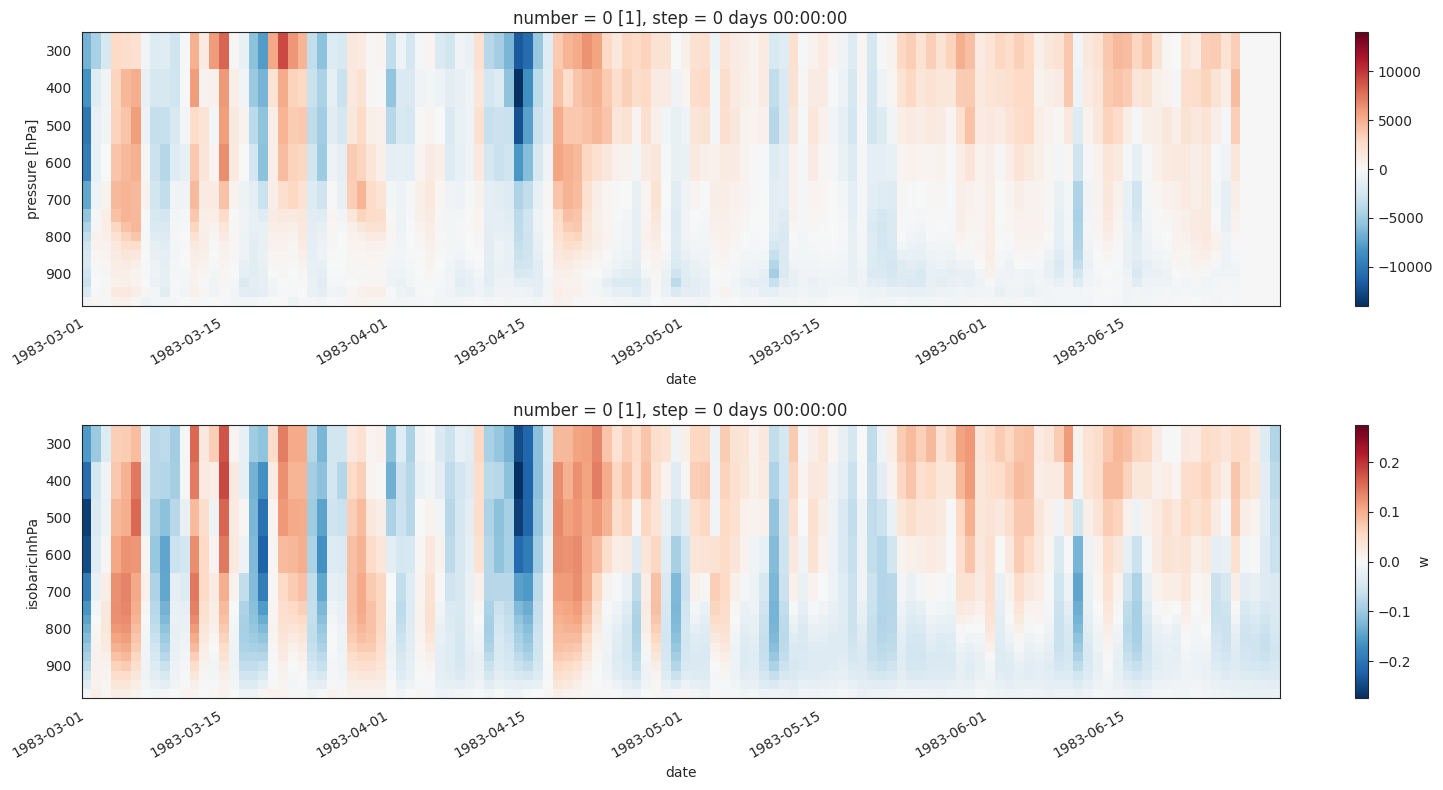

In [249]:
fig,ax = plt.subplots(2,1,figsize=(16,8))
w_gradz_dse_agg.sel(date = w_gradz_dse_agg.date.dt.year==1983, isobaricInhPa=slice(300,975)).transpose().plot(ax=ax[0])
ax[0].invert_yaxis()

ds_mst['w'].sel(date = ds_mst.date.dt.year==1983, isobaricInhPa=slice(300,975)).mean(['latitude','longitude']).transpose().plot(ax=ax[1])
ax[1].invert_yaxis()
plt.tight_layout()
# .plot(**dict(figsize=(16,5), ))
# plt.gca().invert_yaxis()

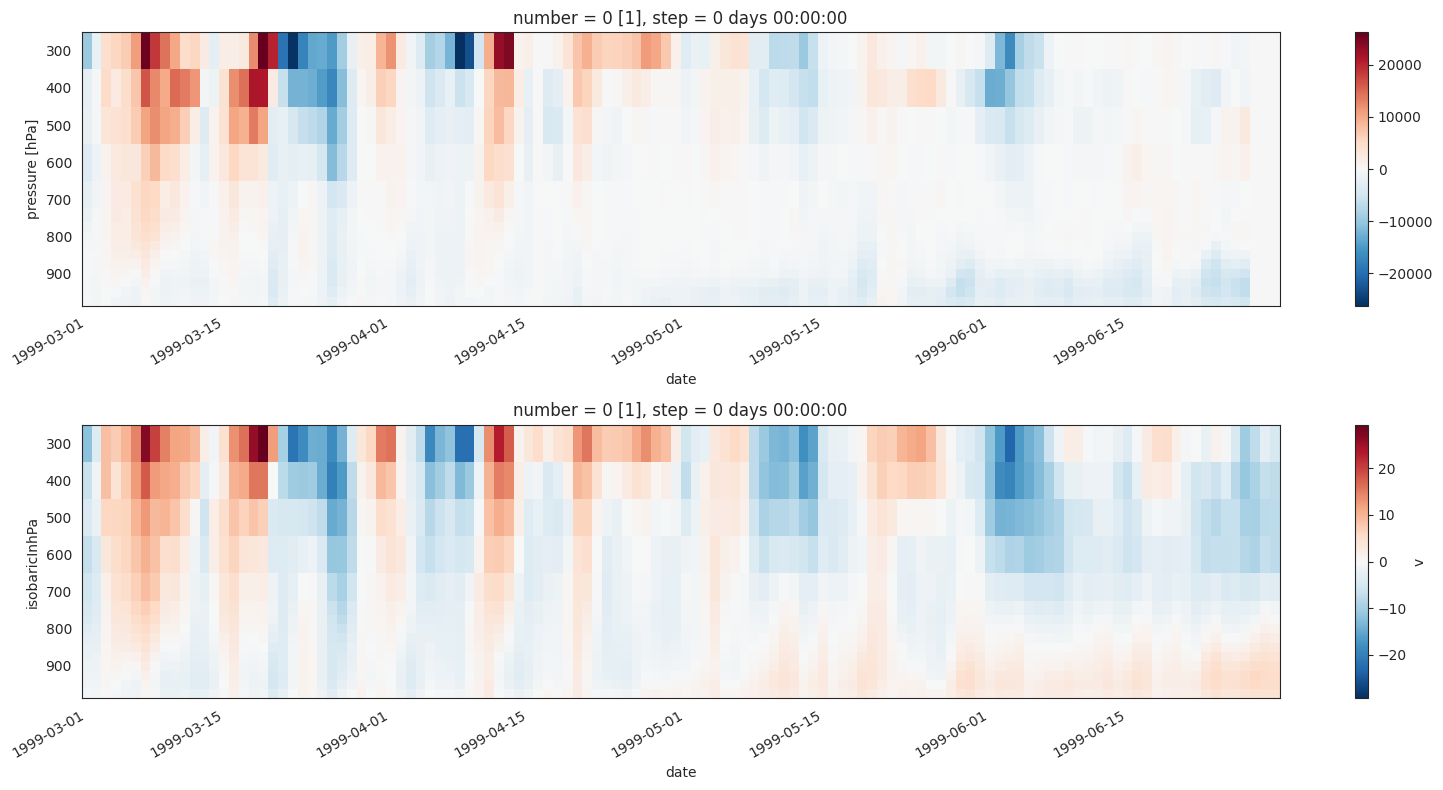

In [183]:
fig,ax = plt.subplots(2,1,figsize=(16,8))
v_grady_dse_agg.sel(date = v_grady_dse_agg.date.dt.year==1999, isobaricInhPa=slice(300,975)).transpose().plot(ax=ax[0])
ax[0].invert_yaxis()

ds_mst['v'].sel(date = ds_mst.date.dt.year==1999, isobaricInhPa=slice(300,975)).mean(['latitude','longitude']).transpose().plot(ax=ax[1])
ax[1].invert_yaxis()
plt.tight_layout()
# .plot(**dict(figsize=(16,5), ))
# plt.gca().invert_yaxis()

- debugging done

4485
4396
cor w/ lag1d sum 0.61
cor w/ same day sum 0.73
cor w/ both days' avg sum 0.78
flxVar_net_colSum, flxVar_lag1d_colSum, dseVar_diffColSum, coready_dse_change, coready_DSEflx_lag1d, coready_DSEflx created


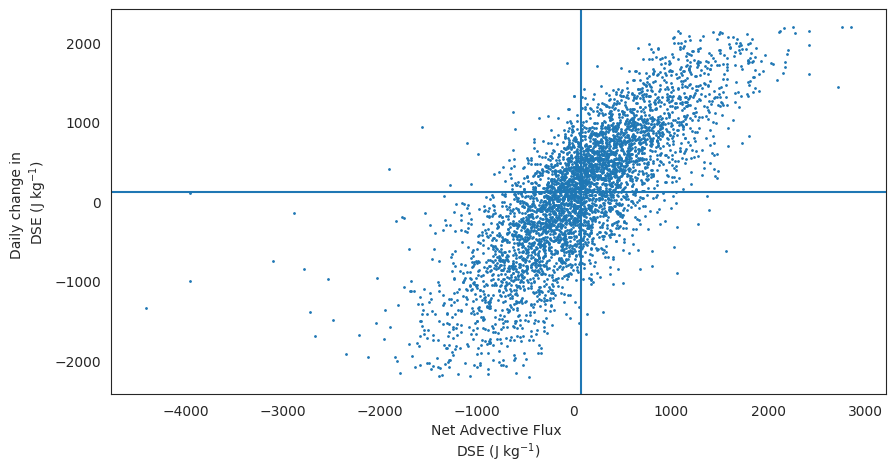

In [180]:
p_low = 600
p_high = 900

ds_flx = (-1*(u_gradx_dse+v_grady_dse+w_gradz_dse)*86400)

coready_DSEflx, coready_DSEflx_lag1d, coready_dse_del1, cor_sameday, cor_lag1d, cor_ave = \
calc_cor(
    flxVar = ds_flx.sel(date = ~ds_flx.date.isin(excl_dates)), #.sel(date = ds_flx.date.dt.year != 1992),
    M = M,

    dlyVar = pt_dse_mean.sel(date = ~pt_dse_mean.date.isin(excl_dates)), #.sel(date = pt_dse_mean.date.dt.year != 1992),
#   dlyVar = tot_dse,
    mon_lst=[3,4,5,6], 
    jun_dmax = 15,

    dlyVar_shifted = pt_dse_shift_mean.sel(date = ~pt_dse_shift_mean.date.isin(excl_dates)), #.sel(date = pt_dse_shift_mean.date.dt.year != 1992), 
#   dlyVar_shifted = tot_dse_shifted, 
    pres_range=[p_low,p_high],
    plots='on',
    trim_quant=.98,
#   xlimits=[-2.5*10**3, 2.5*10**3],
#   ylimits=[-2.5*10**3, 2.5*10**3],
    figsize = (10,5)
        )


In [194]:
# coready_DSEflx.where(coready_DSEflx > 6000, drop=True)
coready_DSEflx.where(coready_DSEflx < -2500, drop=True)

<xarray.DataArray 'coready_DSEflx' (date: 17)>
array([-3559.62095327, -2502.07159347, -3936.09594856, -3968.60987337,
       -2866.4893428 , -2889.18402871, -3899.80751523, -4912.37661064,
       -2990.1597974 , -2816.00586206, -3182.930117  , -3012.86602676,
       -2900.19984649, -2516.60702152, -2639.78076038, -2904.28206876,
       -3184.18385256])
Coordinates:
  * date             (date) datetime64[ns] 1980-03-05 1982-05-12 ... 2020-03-05
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         (date) object '05-Mar' '12-May' ... '15-Apr' '05-Mar'
    dates_roll_clmt  (date) datetime64[ns] 1904-03-05 1904-05-12 ... 1904-03-05
    quantile         float64 0.98

- write daily changes in DSE to nc files

In [ ]:
# coready_dse_del1.drop(['number','step','strftime','quantile']).to_series().rename('DSE_del').to_frame()\
# .to_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/DSE_daily_change_600_900hPa_1980_1994.csv')

# coready_dse_del1.drop(['number','step','strftime','quantile']).to_series().rename('DSE_del').to_frame()\
# .to_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/DSE_daily_change_600_900hPa_1995_2022.csv')

In [186]:
ds_adv_decomp_agg = vert_MassAve_qty(
    M = M, 
    qty = -1*86400*(ds_adv_decomp.sel(date = coready_dse_del1.date.dt.date)), 
    p_low = p_low, p_high = p_high
)

variable = list(ds_adv_decomp_agg.data_vars)[0]

for variable in list(ds_adv_decomp_agg.data_vars):
    ds_adv_decomp_agg = ds_adv_decomp_agg.rename({variable: variable.replace('grad', 'AdvFlx_')})
    

In [187]:
## add through all the RD components to reconstruct the DSE flx field
c=0
da = xr.DataArray()
for v in list(ds_adv_decomp_agg.data_vars):
    if c==0:
        da = ds_adv_decomp_agg[v]
    else: 
        da = da + ds_adv_decomp_agg[v]
    c = c+1
    
ds_adv_decomp_agg['adv_recon'] = da.rename('adv_recon')

In [190]:
len(ds_adv_decomp_agg.date)

4395

### Quantify the relationship between DSE change and DSE fluxes

In [193]:
df_lr = pd.concat([coready_dse_del1.to_pandas(), ((coready_DSEflx_lag1d+coready_DSEflx)/2).to_pandas()], axis=1).dropna()\
.rename({0:'dse_del1',1:'dse_flx_2Dave'},axis=1)

# df_lr = df_lr.loc[df_lr.dse_flx_2Dave > -2500]

from sklearn.linear_model import LinearRegression
model = LinearRegression()

x = df_lr['dse_flx_2Dave'].to_numpy().reshape((-1, 1))
# x = ((coready_DSEflx_lag1d)).to_numpy().reshape((-1, 1))
# x = ((coready_DSEflx)).to_numpy().reshape((-1, 1))

x = (x - x.mean())/x.std()

y = df_lr['dse_del1'].to_numpy()
y = (y - y.mean())/y.std()

model.fit(x,y)

r_sq = np.round(model.score(x, y),2)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.61
intercept: 1.279488128084142e-17
slope: [0.78254656]


# Correlations bw *DSE flux* and *DSE change*, for all possible level combinations

In [ ]:
# df_dseCor = pd.DataFrame(columns = ['p_low', 'p_high', 'cor_lag1d', 'cor_sameday', 'cor_ave'])

# p_high=975
# p_arr = np.unique(ds_mst.isobaricInhPa)
# p_arr = p_arr[:-1]

# p_arr[:[i for i in range(len(p_arr)) if p_arr[i]==p_high][0]]

# k=0

# for p_high in p_arr[1:]:
#     print('p_high', p_high)
#     for p_low in p_arr[:[i for i in range(len(p_arr)) if p_arr[i]==p_high][0]]:
#         print('p_low', p_low)
#         coready_DSEflx, coready_DSEflx_lag1d, coready_dse_del1, cor_sameday, cor_lag1d, cor_ave = \
#         calc_cor(flxVar = (-1*(u_gradx_dse+v_grady_dse+w_gradz_dse)*M*86400)\
#                  .sel(latitude=slice(24,30.75), longitude=slice(68,77.75))\
#                  .sum(['latitude','longitude']), 

#         #          dlyVar = pt_dse_mean,
#                  dlyVar = tot_dse,

#         #          dlyVar_shifted = pt_dse_shift_mean, 
#                  dlyVar_shifted = tot_dse_shifted, 
#                  pres_range=[p_low,p_high],
#                  plots='off'
#                 )

#         df_dseCor.loc[k]  = [p_low, p_high, cor_lag1d, cor_sameday, cor_ave]

#         k=k+1
#         print(k)

In [ ]:
# df_dseCor = pd.DataFrame(columns = ['p_low', 'p_high', 'cor_lag1d', 'cor_sameday', 'cor_ave'])

# p_high=975
# p_arr = np.unique(ds_mst.isobaricInhPa)
# p_arr = p_arr[:-1]

# p_arr[:[i for i in range(len(p_arr)) if p_arr[i]==p_high][0]]

# k=0

# for p_high in p_arr[1:]:
#     print('p_high', p_high)
#     for p_low in p_arr[:[i for i in range(len(p_arr)) if p_arr[i]==p_high][0]]:
#         print('p_low', p_low)
#         coready_DSEflx, coready_DSEflx_lag1d, coready_dse_del1, cor_sameday, cor_lag1d, cor_ave = \
#         calc_cor(flxVar = (-1*(u_gradx_dse+v_grady_dse+w_gradz_dse)*86400), 
#                  M = M,

#                  dlyVar = pt_dse_mean,
# #                  dlyVar = tot_dse,

#                  dlyVar_shifted = pt_dse_shift_mean, 
# #                  dlyVar_shifted = tot_dse_shifted, 
#                  pres_range=[p_low,p_high],
#                  plots='off'
#                 )

#         df_dseCor.loc[k]  = [p_low, p_high, cor_lag1d, cor_sameday, cor_ave]

#         k=k+1
#         print(k)

In [ ]:
# df_dseCor.to_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/Cors_plevs_DSEchange_flxs_1980_1994.nc')

# df_dseCor = pd.read_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/Cors_plevs_DSEchange_flxs_1980_1994.nc')
# df_dseCor = pd.read_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/Cors_plevs_DSEchange_flxs_1995_2009.nc')

In [ ]:
# df_dseCor.to_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/Cors_plevs_DSEchange_flxs_1995_2009.nc')

In [ ]:
# df_dseCor.to_csv('/home/data/lab_hardik/analysis/Cors_plevs_DSEchange_flxs_2010_22.nc')

In [ ]:
# df_dseCor.loc[df_dseCor.cor_ave > df_dseCor.cor_ave.quantile(.9)].sort_values(['cor_ave','p_low', 'p_high'], ascending=False)


In [ ]:
# df_dseCor.loc[df_dseCor.p_low == 500].sort_values('p_low', ascending=False)


In [ ]:
# df_dseCor.loc[df_dseCor.p_low == 700].sort_values('p_low', ascending=False)


In [ ]:
# df_dseCor.loc[df_dseCor.cor_ave < df_dseCor.cor_ave.quantile(.1)].sort_values('p_low', ascending=False)
# df_dseCor.loc[(df_dseCor.p_low == 300) & (df_dseCor.p_high == 400)] #.sort_values('p_low', ascending=False)

In [ ]:
# df_dseCor.loc[(df_dseCor.p_high == 900)] #.sort_values('p_low', ascending=False)

In [ ]:
# df_dseCor.loc[(df_dseCor.p_low == 600)].sort_values(['cor_ave','p_high'], ascending=False)

# 600-900 and 900-950 levels worth studying
### export dataarrays corresponding to both, for all months

In [196]:
Net_Flux_600_900 = vert_MassAve_qty(
    M = M, 
    qty = -1*(u_gradx_dse+v_grady_dse+w_gradz_dse)*86400, 
    p_low=600, p_high=900
)

Net_Flux_600_900_Lag1 = Net_Flux_600_900.shift(date=1)

Net_Flux_600_900_Lag1.loc[dict(date = (Net_Flux_600_900_Lag1.date.dt.day==1) & 
                                  (Net_Flux_600_900_Lag1.date.dt.month==3))
                            ] = np.nan

Net_Flux_600_900_Lag1 = Net_Flux_600_900_Lag1\
.where(Net_Flux_600_900_Lag1==Net_Flux_600_900_Lag1, drop=True)

Net_Flux_600_900_ave2D = 0.5*(Net_Flux_600_900 + Net_Flux_600_900_Lag1)

Net_Flux_600_900_ave2D

<xarray.DataArray (date: 5200)>
array([1828.73423068, 1735.99086608, 1021.30243051, ...,    0.        ,
          0.        ,    0.        ])
Coordinates:
  * date             (date) datetime64[ns] 1980-03-02 1980-03-03 ... 2022-06-30
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         (date) object '02-Mar' '03-Mar' ... '29-Jun' '30-Jun'
    dates_roll_clmt  (date) datetime64[ns] 1904-03-02 1904-03-03 ... 1904-06-30

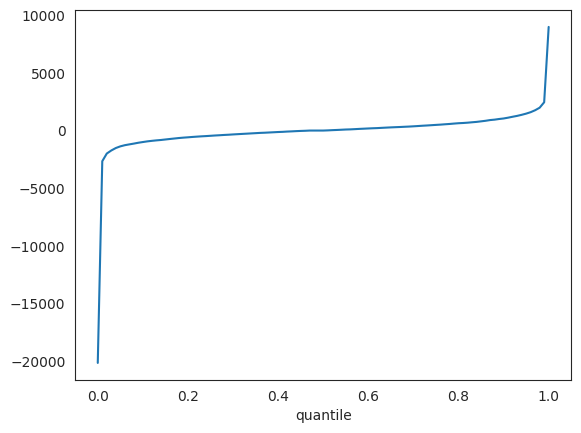

In [197]:
Net_Flux_600_900.quantile(np.linspace(0,1,101)).plot()

In [202]:
yr_min = Net_Flux_600_900.date.dt.year.min().data
yr_max = Net_Flux_600_900.date.dt.year.max().data
print(yr_min)
print(yr_max)


1980
2022


In [203]:
out_dir = '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/'

Net_Flux_600_900_ave2D.name = 'DSE_Flux_600_900hPa_ave2D'
Net_Flux_600_900_ave2D.to_netcdf(out_dir + 'DSE_Flux_600_900hPa_ave2D_{}_{}_rolling.nc'.format(yr_min, yr_max))

Net_Flux_600_900_Lag1.name = 'DSE_Flux_600_900hPa_Lag1'
Net_Flux_600_900_Lag1.to_netcdf(out_dir + 'DSE_Flux_600_900hPa_{}_{}_Lag1_rolling.nc'.format(yr_min, yr_max))

Net_Flux_600_900.name = 'DSE_Flux_600_900hPa'
Net_Flux_600_900.to_netcdf(out_dir + 'DSE_Flux_600_900hPa_{}_{}_rolling.nc'.format(yr_min, yr_max))


In [204]:
Net_Flux_900_950 = vert_MassAve_qty(
    M = M, 
    qty = -1*(u_gradx_dse+v_grady_dse+w_gradz_dse)*86400, 
    p_low=900, p_high=950
)

Net_Flux_900_950_Lag1 = Net_Flux_900_950.shift(date=1)
Net_Flux_900_950_Lag1.loc[dict(date = (Net_Flux_900_950_Lag1.date.dt.day==1) & 
                                  (Net_Flux_900_950_Lag1.date.dt.month==3))
                            ] = np.nan

Net_Flux_900_950_Lag1 = Net_Flux_900_950_Lag1\
.where(Net_Flux_900_950_Lag1==Net_Flux_900_950_Lag1, drop=True)

Net_Flux_900_950_ave2D = 0.5*(Net_Flux_900_950 + Net_Flux_900_950_Lag1)


In [205]:
Net_Flux_925_950 = vert_MassAve_qty(
    M = M, 
    qty = -1*(u_gradx_dse+v_grady_dse+w_gradz_dse)*86400, 
    p_low=925, p_high=950
)

Net_Flux_925_950_Lag1 = Net_Flux_925_950.shift(date=1)
Net_Flux_925_950_Lag1.loc[dict(date = (Net_Flux_925_950_Lag1.date.dt.day==1) & 
                                  (Net_Flux_925_950_Lag1.date.dt.month==3))
                            ] = np.nan

Net_Flux_925_950_Lag1 = Net_Flux_925_950_Lag1\
.where(Net_Flux_925_950_Lag1==Net_Flux_925_950_Lag1, drop=True)

Net_Flux_925_950_ave2D = 0.5*(Net_Flux_925_950 + Net_Flux_925_950_Lag1)


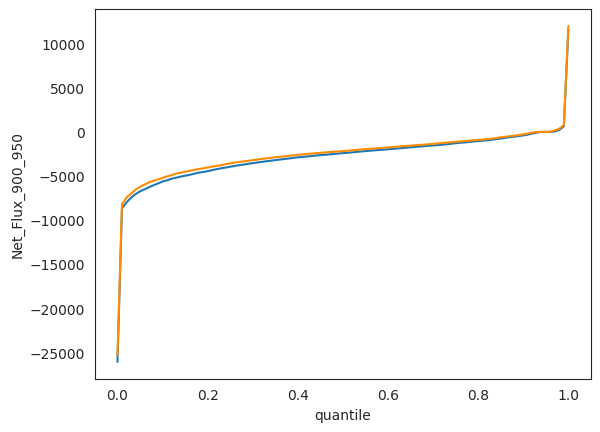

In [206]:
# fig,ax=plt.subplots(1,2,figsize=(16,5))
Net_Flux_925_950.rename('Net_Flux_925_950').quantile(np.linspace(0,1,101)).plot()
Net_Flux_900_950.rename('Net_Flux_900_950').quantile(np.linspace(0,1,101)).plot(c='darkorange')

# both look very similar; can use either for near surface fluxes

In [207]:
yr_min = Net_Flux_900_950.date.dt.year.min().data
yr_max = Net_Flux_900_950.date.dt.year.max().data

print(yr_min)
print(yr_max)

1980
2022


In [208]:
out_dir = '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/'

Net_Flux_900_950_ave2D.name = 'DSE_Flux_900_950hPa_ave2D'
Net_Flux_900_950_ave2D.to_netcdf(out_dir + 'DSE_Flux_900_950hPa_ave2D_{}_{}_rolling.nc'.format(yr_min, yr_max))

Net_Flux_900_950_Lag1.name = 'DSE_Flux_900_950hPa_Lag1'
Net_Flux_900_950_Lag1.to_netcdf(out_dir + 'DSE_Flux_900_950hPa_{}_{}_Lag1_rolling.nc'.format(yr_min, yr_max))

Net_Flux_900_950.name = 'DSE_Flux_900_950hPa'
Net_Flux_900_950.to_netcdf(out_dir + 'DSE_Flux_900_950hPa_{}_{}_rolling.nc'.format(yr_min, yr_max))


In [758]:
# adv_dse_900_950hPa = u_conv_dse.sel(isobaricInhPa=slice(900,950)).sum('isobaricInhPa')

# dseAdv_lag1d_900_950hPa = adv_dse_900_950hPa.shift(date=1)

# dseAdv_lag1d_900_950hPa.loc[dict(date = (dseAdv_lag1d_900_950hPa.date.dt.day==1) & 
#                                   (dseAdv_lag1d_900_950hPa.date.dt.month==3))
#                             ] = np.nan

# dseAdv_lag1d_900_950hPa = dseAdv_lag1d_900_950hPa\
# .where(dseAdv_lag1d_900_950hPa==dseAdv_lag1d_900_950hPa, drop=True)

# dseAdv_ave2D_900_950hPa = 0.5*(adv_dse_900_950hPa + dseAdv_lag1d_900_950hPa)

# dseAdv_ave2D_900_950hPa.name = 'dseAdv_ave2D_900_950hPa'
# out_dir = '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/'

# dseAdv_ave2D_900_950hPa.to_netcdf(out_dir + 'dseAdv_ave2D_900_950hPa_1995_2009.nc')

# dseAdv_lag1d_900_950hPa.name = 'dseAdv_lag1d_900_950hPa'
# dseAdv_lag1d_900_950hPa.to_netcdf(out_dir + 'dseAdv_lag1D_900_950hPa_1995_2009.nc')

# adv_dse_900_950hPa.name = 'adv_dse_900_950hPa'
# adv_dse_900_950hPa.to_netcdf(out_dir + 'dseAdv_900_950hPa_1995_2009.nc')


## Change pressure limits here for analysis

In [209]:
os.chdir('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/')

In [210]:
p_low = 600
p_high = 900
mon_lst = [3,4,5,6]

In [211]:
tot_dse_shifted = tot_dse.shift(date=1)

tot_dse_shifted.loc[dict(date = (tot_dse_shifted.date.dt.day==1) & 
                                  (tot_dse_shifted.date.dt.month==3))
                            ] = np.nan

tot_dse_shifted = tot_dse_shifted.dropna('date')


In [212]:
# Daily DSE difference
tot_dse_diffColSum = ((tot_dse - tot_dse_shifted))\
.sel(isobaricInhPa=slice(p_low,p_high))\
.sum('isobaricInhPa', skipna=False)

if 6 not in mon_lst:
    coready_dse_del1 = tot_dse_diffColSum.dropna('date').sel(date = tot_dse_diffColSum.date.dt.month.isin(mon_lst))
else:
    coready_dse_del1 = tot_dse_diffColSum.dropna('date')\
    .sel(date = 
         (tot_dse_diffColSum.date.dt.month.isin([s for s in mon_lst if s != 6])) | 
         ((tot_dse_diffColSum.date.dt.day <= 15) & (tot_dse_diffColSum.date.dt.month == 6))
        ).compute()

coready_dse_del1 = (coready_dse_del1.where(
    np.abs(coready_dse_del1) <= np.abs(coready_dse_del1).quantile(.98), drop=True
)/tot_mass_bw_levs(M, p_low, p_high)).compute() # 

coready_DSEAdv = vert_MassAve_qty(
    M = M, 
    qty = -1*86400*(u_gradx_dse+v_grady_dse+w_gradz_dse)\
    .sel(date = coready_dse_del1.date.dt.date), 
    p_low = p_low, p_high = p_high
 )

dly_DSE_flx = coready_DSEAdv

0.6997422496653338
0.5207936153247764


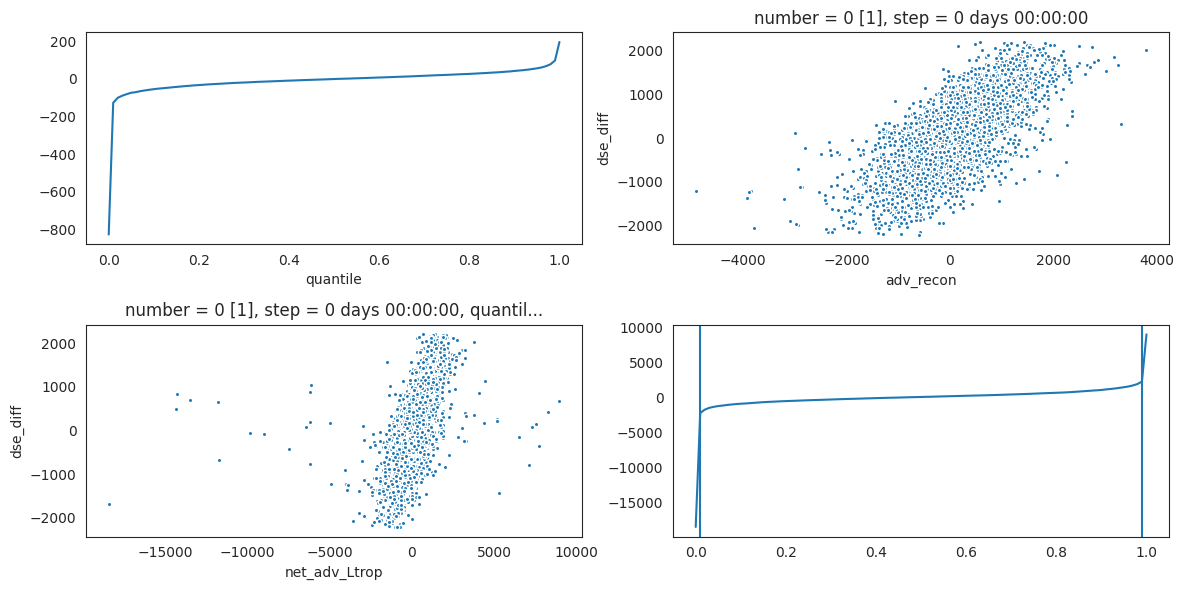

In [213]:
fig,ax = plt.subplots(2,2, figsize=(12,6))
(ds_adv_decomp_agg['adv_recon'] - dly_DSE_flx).quantile(np.linspace(0,1,101)).plot(ax=ax[0,0])

# plt.axhline(ds_adv_decomp_agg['adv_recon'].quantile(.34))
# plt.axhline(ds_adv_decomp_agg['adv_recon'].quantile(.67))
# plt.axhline(ds_adv_decomp_agg['adv_recon'].quantile(.975))
# xr.plot.scatter(xr.merge([ds_adv_decomp_agg['adv_recon'], coready_dse_del1.rename('dse_diff')]))

ds_recon_comp = xr.merge(
    [ds_adv_decomp_agg['adv_recon'].drop('quantile'), 
     coready_dse_del1.rename('dse_diff').drop('quantile')]
).dropna('date')
# .drop(['number','step'])

ds_recon_comp.plot.scatter(x = 'adv_recon', y='dse_diff', s=10, ax=ax[0,1])
print(xr.corr(ds_recon_comp['adv_recon'], ds_recon_comp['dse_diff']).data)

ds_act_comp = xr.merge([Net_Flux_600_900.rename('net_adv_Ltrop'), coready_dse_del1.rename('dse_diff')]).dropna('date').compute()
# .drop(['number','step','quantile'])
ds_act_comp.plot.scatter(x = 'net_adv_Ltrop', y='dse_diff', s=10, ax=ax[1,0])
print(xr.corr(ds_act_comp['net_adv_Ltrop'], ds_act_comp['dse_diff']).data)

# ax[1].set_xlim(-2500, 2500)
# ax[2].set_xlim(-2500, 2500)

plt.tight_layout()

ds_act_comp['net_adv_Ltrop'].to_pandas().quantile(np.linspace(0,1,101)).plot(ax=ax[1,1])
ax[1,1].axvline(0.01)
ax[1,1].axvline(0.99)


In [214]:
# coready_DSEAdv - 
# coready_DSEflx 
print(np.unique(coready_dse_del1.date.dt.month))
print(np.unique(coready_dse_del1.date.dt.day))
# coready_dse_change

[3 4 5 6]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [215]:
gc.collect()

84194

In [216]:
importlib.reload(custom_funcs)
from custom_funcs import *
# help(custom_funcs)

In [217]:
# coready_DSEAdv - 
# coready_DSEflx 
print(np.unique(coready_dse_del1.date.dt.month))
print(np.unique(coready_dse_del1.date.dt.day))
# coready_dse_change

[3 4 5 6]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [218]:
from sklearn.preprocessing import StandardScaler 

df_mlr = \
xr.merge(
[
    ds_adv_decomp_agg, coready_dse_del1.rename('coready_dse_del1').to_dataset()
]
).to_pandas().drop(['strftime', 'quantile'], axis=1).dropna()

print(df_mlr.index.month.unique().values)
print(df_mlr.shape)

[3 4 5 6]
(4383, 17)


In [219]:
df_mlr.columns

Index(['number', 'step', 'dates_roll_clmt', 'uAnom_AdvFlx_x_dseAnom',
       'vAnom_AdvFlx_y_dseAnom', 'wAnom_AdvFlx_z_dseAnom',
       'uAnom_AdvFlx_x_dseClmt', 'vAnom_AdvFlx_y_dseClmt',
       'wAnom_AdvFlx_z_dseClmt', 'uclmt_AdvFlx_x_dseAnom',
       'vclmt_AdvFlx_y_dseAnom', 'wclmt_AdvFlx_z_dseAnom',
       'uclmt_AdvFlx_x_dseClmt', 'vclmt_AdvFlx_y_dseClmt',
       'wclmt_AdvFlx_z_dseClmt', 'adv_recon', 'coready_dse_del1'],
      dtype='object')

In [220]:
df_mlr.wAnom_AdvFlx_z_dseAnom.describe()

count    4383.000000
mean      109.280809
std       280.800408
min     -1912.593014
25%       -32.314173
50%        83.788611
75%       218.542841
max      2827.570614
Name: wAnom_AdvFlx_z_dseAnom, dtype: float64

In [246]:
yr_min = df_mlr.index.year.min()
yr_max = df_mlr.index.year.max()

print(yr_min, yr_max)

1980 2022


In [228]:
# df_mlr.to_csv('/home/data/lab_hardik/HW/DSE_LL_decompFull_mar_apr.csv')
# df_mlr.to_csv('/home/data/lab_hardik/HW/DSE_LL_decompFull_may_jun.csv')

df_mlr.to_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/DSE_LL_decompFull_prmnsn_{}_{}_rolling.csv'.format(yr_min, yr_max))
# df_mlr.to_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/DSE_LL_decompFull_prmnsn_1980_1994.csv')
# df_mlr.to_csv('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/DSE_LL_decompFull_prmnsn_1995_2009.csv')


In [233]:
ds_mst['dse_anom'] = ds_brkdwn['dse_anom'].copy()

In [236]:
ds_mst
# ['dse_anom']

<xarray.Dataset>
Dimensions:          (isobaricInhPa: 23, latitude: 29, longitude: 41, date: 5246)
Coordinates:
  * isobaricInhPa    (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
  * latitude         (latitude) float64 24.0 24.25 24.5 ... 30.5 30.75 31.0
  * longitude        (longitude) float64 68.0 68.25 68.5 ... 77.5 77.75 78.0
  * date             (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-06-30
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         (date) object '01-Mar' '02-Mar' ... '29-Jun' '30-Jun'
    dates_roll_clmt  (date) datetime64[ns] 1904-03-01 1904-03-02 ... 1904-06-30
Data variables:
    z                (date, isobaricInhPa, latitude, longitude) float32 1.616...
    t                (date, isobaricInhPa, latitude, longitude) float32 194.6...
    u                (date, isobaricInhPa, latitude, longitude) float32 25.44...
    v                (date, isobaricInhPa, latitude, longitude) float32 -6.15...
    w                (date, isobaricInhPa, latitude, longitude) float32 -0.00...
    density          (isobaricInhPa, date, latitude, longitude) float64 0.179...
    z_diff_down      (date, isobaricInhPa, latitude, longitude) float32 1.263...
    pt_dse           (date, isobaricInhPa, latitude, longitude) float32 3.572...
    dse_anom         (date) float64 -1.92e+03 -554.5 1.235e+03 ... 0.0 0.0 0.0

In [234]:
grady_dseAnom = grad_y(ds_mst['dse_anom']).rename('grady_dseAnom').to_dataset()
gradx_dseAnom = grad_x(ds_mst['dse_anom']).rename('gradx_dseAnom').to_dataset()
gradz_dseAnom = grad_z(ds_mst['dse_anom'], ds_mst['z_diff_down']/g).rename('gradz_dseAnom').to_dataset()


AttributeError: 'DataArray' object has no attribute 'latitude'

In [773]:
ds_mst2 = ds_mst[
    [
        'z',
        'z_diff_down',
        't',
        'density',
        'u',
        'v',
        'w',
        #  'theta_grad_z',
        'pt_dse',
        'w_up',
        'w_down',
        't_anom',
        'z_anom',
        'u_anom',
        'v_anom',
        'w_down_anom',
        'dse_anom'
    ]
]

ds_mst2['dse_clmt'] = ds_mst2['pt_dse'] - ds_mst2['dse_anom']


In [774]:
ds_mst2['dse_clmt'].isel(latitude=0, longitude=0, date=0)

<xarray.DataArray 'dse_clmt' (isobaricInhPa: 23)>
array([360856.12, 353281.34, 348229.03, 344599.03, 341513.06, 338720.66,
       336221.06, 331947.53, 325549.44, 320398.16, 315629.06, 311230.8 ,
       309122.  , 308097.16, 307104.9 , 306164.88, 305296.28, 304503.88,
       303772.2 , 303011.4 , 302116.38, 300864.16, 299108.5 ],
      dtype=float32)
Coordinates:
  * isobaricInhPa    (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
    latitude         float64 24.0
    longitude        float64 68.0
    date             datetime64[ns] 1980-03-01
    number           int64 ...
    step             timedelta64[ns] ...
    strftime         <U6 '01-Mar'
    dates_roll_clmt  datetime64[ns] ...

In [775]:
dse_anom_tst = ds_mst2[['dse_clmt','z_diff_down']].isel(latitude=0, longitude=0, date=100)

In [ ]:
dse_anom_tst['dse_clmt']

In [777]:
(dse_anom_tst['dse_clmt'] - dse_anom_tst['dse_clmt'].shift(isobaricInhPa = -1))/\
(dse_anom_tst['z_diff_down']/g)

<xarray.DataArray (isobaricInhPa: 23)>
array([ 4.326194 ,  2.5684342,  1.9190692,  1.7923325,  1.8969313,
        2.0577765,  2.4051433,  3.1927674,  4.3749623,  3.4350145,
        1.8736085,  2.1276007,  2.6891918,  3.3802304,  4.2746754,
        5.925999 ,  8.4113035, 11.06804  , 10.213303 ,  7.120862 ,
        3.1960886,  1.1711316,        nan], dtype=float32)
Coordinates:
  * isobaricInhPa    (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
    latitude         float64 24.0
    longitude        float64 68.0
    date             datetime64[ns] 1980-06-09
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         <U6 '09-Jun'
    dates_roll_clmt  datetime64[ns] 1904-06-09

## Pointwise gradients computed below

In [778]:
ds_mst2['gradx_dseAnom'] = grad_x(ds_mst2['dse_anom']).rename('gradx_dseAnom')
ds_mst2['grady_dseAnom'] = grad_y(ds_mst2['dse_anom']).rename('grady_dseAnom')
ds_mst2['gradz_dseAnom'] = grad_z_act(ds_mst2['dse_anom'], ds_mst2['z_diff_down']/g).rename('gradz_dseAnom')

ds_mst2['gradx_dseClmt'] = grad_x(ds_mst2['dse_clmt']).rename('gradx_dseClmt')
ds_mst2['gradz_dseClmt'] = grad_z_act(ds_mst2['dse_clmt'], ds_mst2['z_diff_down']/g).rename('gradz_dseClmt')
ds_mst2['grady_dseClmt'] = grad_y(ds_mst2['dse_clmt']).rename('grady_dseClmt')

In [779]:
ds_mst2['gradx_vAnom'] = grad_x(ds_mst2['v_anom']).rename('grady_vAnom')
ds_mst2['grady_vAnom'] = grad_y(ds_mst2['v_anom']).rename('grady_vAnom')
ds_mst2['gradz_vAnom'] = grad_z_act(ds_mst2['v_anom'], ds_mst2['z_diff_down']/g).rename('gradz_vAnom')

In [780]:
ds_mst2['gradx_uAnom'] = grad_x(ds_mst2['u_anom']).rename('grady_uAnom')
ds_mst2['grady_uAnom'] = grad_y(ds_mst2['u_anom']).rename('grady_uAnom')
ds_mst2['gradz_uAnom'] = grad_z_act(ds_mst2['u_anom'], ds_mst2['z_diff_down']/g).rename('gradz_uAnom')


In [781]:
ds_mst2['gradx_uAnom'] = grad_x(ds_mst2['u_anom']).rename('grady_uAnom')
ds_mst2['grady_uAnom'] = grad_y(ds_mst2['u_anom']).rename('grady_uAnom')
ds_mst2['gradz_uAnom'] = grad_z_act(ds_mst2['u_anom'], ds_mst2['z_diff_down']/g).rename('gradz_uAnom')


In [782]:
ds_mst2['u_clmt'] = ds_mst2['u'] - ds_mst2['u_anom']
ds_mst2['v_clmt'] = ds_mst2['v'] - ds_mst2['v_anom']
ds_mst2['w_down_clmt'] = ds_mst2['w_down'] - ds_mst2['w_down_anom']

ds_mst2['grady_u'] = grad_y(ds_mst2['u']).rename('grady_u')
ds_mst2['grady_uClmt'] = grad_y(ds_mst2['u_clmt']).rename('grady_uClmt')
ds_mst2['grady_uAnom'] = grad_y(ds_mst2['u_anom']).rename('grady_uAnom')

ds_mst2['gradx_vAnom'] = grad_x(ds_mst2['v_anom']).rename('gradx_vAnom')
ds_mst2['grady_vAnom'] = grad_y(ds_mst2['v_anom']).rename('grady_vAnom')

In [7]:
list(ds_mst2.vars)

NameError: name 'ds_mst2' is not defined

In [783]:
ds_adv_decomp_agg2 = ds_adv_decomp_agg

# variable = list(ds_adv_decomp_agg2.data_vars)[0]
# for variable in list(ds_adv_decomp_agg2.data_vars):
#     ds_adv_decomp_agg2 = ds_adv_decomp_agg2.rename({variable: variable.replace('grad', 'AdvFlx_')})

## Mass averaging of all ds_mst2 variables
        'z',
        'z_diff_down',
        't',
        'density',
        'u',
        'v',
        'w',
        #  'theta_grad_z',
        'pt_dse',
        'w_up',
        'w_down',
        't_anom',
        'z_anom',
        'u_anom',
        'v_anom',
        'w_down_anom',
        'dse_anom'


## Mass averaging of all fundamental quantities

In [784]:
# ds_anal0 = xr.merge([ds_mst2, grady_dseAnom, gradx_dseAnom, gradz_dseAnom])
ds_anal0 = ds_mst2
ds_anal1 = \
(M*ds_anal0).sel(
        isobaricInhPa = slice(p_low, p_high), latitude=slice(24,30.75), longitude=slice(68,77.75)
    ).sum(['isobaricInhPa','latitude','longitude'])/(tot_mass_bw_levs(M, p_low, p_high))

In [785]:
ds_analysis0 = \
xr.merge([ds_adv_decomp_agg2, ds_anal1])

## ds_analysis0 now has all the fundamental quantities including gradient components, at point level

In [786]:
list(ds_analysis0.data_vars)

['uAnom_AdvFlx_x_dseAnom',
 'vAnom_AdvFlx_y_dseAnom',
 'wAnom_AdvFlx_z_dseAnom',
 'uAnom_AdvFlx_x_dseClmt',
 'vAnom_AdvFlx_y_dseClmt',
 'wAnom_AdvFlx_z_dseClmt',
 'uclmt_AdvFlx_x_dseAnom',
 'vclmt_AdvFlx_y_dseAnom',
 'wclmt_AdvFlx_z_dseAnom',
 'uclmt_AdvFlx_x_dseClmt',
 'vclmt_AdvFlx_y_dseClmt',
 'wclmt_AdvFlx_z_dseClmt',
 'adv_recon',
 'z',
 'z_diff_down',
 't',
 'density',
 'u',
 'v',
 'w',
 'pt_dse',
 'w_up',
 'w_down',
 't_anom',
 'z_anom',
 'u_anom',
 'v_anom',
 'w_down_anom',
 'dse_anom',
 'dse_clmt',
 'gradx_dseAnom',
 'grady_dseAnom',
 'gradz_dseAnom',
 'gradx_dseClmt',
 'gradz_dseClmt',
 'grady_dseClmt',
 'gradx_vAnom',
 'grady_vAnom',
 'gradz_vAnom',
 'gradx_uAnom',
 'grady_uAnom',
 'gradz_uAnom',
 'u_clmt',
 'v_clmt',
 'w_down_clmt',
 'grady_u',
 'grady_uClmt']

In [8]:
# '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/advection_breakdowns_'

In [787]:
ds_analysis0.drop(['quantile'])\
.to_netcdf('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/advection_breakdowns_{}_{}_rolling.nc'.format(yr_min, yr_max))


In [788]:
# ds_analysis0.drop(['quantile'])\
# .to_netcdf('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/advection_breakdowns_1995_2009_rolling.nc')


In [789]:
# ds_analysis0.drop(['quantile'])\
# .to_netcdf('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/advection_breakdowns_1980_1994.nc')

# xr.merge([ds_analysis0, t2m_anom_series])\
# .drop(['quantile'])\
# .to_netcdf('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/advection_breakdowns_1995_2009.nc')

# xr.merge([ds_analysis0, t2m_anom_series])\
# .drop(['quantile']).to_netcdf('/home/data/lab_hardik/HW/advection_breakdowns_2010_22.nc')

In [790]:
# xr.merge([ds_analysis0, t2m_anom_series])\
# .drop(['quantile']).to_netcdf('/home/data/lab_hardik/HW/advection_breakdowns_2010_22.nc')

In [791]:
yr_min

1980

In [792]:
yr_max

1994